In [194]:
import pandas as pd
from scipy import stats
import numpy as np
import string
import re
import nltk
import spacy

In [195]:
#df = pd.read_csv('NLP_project_kickoff_data.csv', encoding='utf-8')
df = pd.read_csv('NLP_project_kickoff_data.csv', encoding='utf-8')

In [196]:
df.head()

,Unnamed: 0,account,caption,profile_name,biography,id,following,likes,posts_count,followers,is_verified,datetime,image_url,url,comments,video_view_count,video_url,timestamp,adultScore,racyScore,goreScore,isBWImg,clipArtType,lineDrawingType,tokens
0,0,dr_hazem_alfie,"I am Dr Hazem Alfie, Plastic and Cosmetic Surg...",NaN,NaN,2.680000e+18,2,15,1,28,0,1634065389,j_kvihwg0g1c283e3byk.0f2035486e2f1b57c59707ec9...,https://www.instagram.com/p/CU8IoDEr-x3/,4,0,NaN,2021-11-02T19:40:32.981Z,0.001138,0.002034,0.000703,0,0,0,"['White', 'human', 'face', 'person', 'smile', ..."
1,1,british_face_clinic,British Face Clinic is offering free facial co...,British Face Clinic,"Facial Cosmetics, ENT and Thyroid Clinic by Mr...",1.920000e+18,106,10,4,56,0,1542635007,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqXTArshaKO/,0,0,NaN,2021-11-02T19:40:36.300Z,0.014004,0.016998,0.002984,0,0,0,"['White', 'Grey', 'text', 'human', 'face', 'fa..."
2,2,british_face_clinic,"Need fuller lips? Consider PermaLipâ„¢\n""Lip I...",British Face Clinic,"Facial Cosmetics, ENT and Thyroid Clinic by Mr...",1.920000e+18,106,9,4,56,0,1543377164,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqtakFwhYpo/,0,0,NaN,2021-11-02T19:40:36.300Z,0.002261,0.011085,0.011169,0,0,0,"['White', 'skin', 'lip', 'closeup', 'eyelash',..."
3,3,british_face_clinic,A recent successful Rhinoplasty procedure resu...,British Face Clinic,"Facial Cosmetics, ENT and Thyroid Clinic by Mr...",1.920000e+18,106,7,4,56,0,1542967109,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqhMccDBf5z/,1,0,NaN,2021-11-02T19:40:36.300Z,0.005521,0.009230,0.000926,0,0,0,"['White', 'Grey', 'text', 'screenshot', 'dog',..."
4,4,dr_danmarsh,Tummytuck at 6 months post op. Final results t...,Dr Dan Marsh PhD FRCS (plast),"ðŸŒ� London, UK\nðŸ�¥ Co-founder @theplasticsu...",2.400000e+18,109,2778,309,72047,1,1600373084,j_kvihwg0g1c283e3byk.d165e082aac6a78850c61cecd...,https://www.instagram.com/p/CFQBpv2n2sG/,161,0,NaN,2021-11-02T19:40:32.890Z,0.144270,0.989714,0.001252,0,0,0,"['Brown', 'Black', 'Pink', 'undergarment', 'cl..."


In [197]:
df_emo= pd.read_csv('emojis.csv')

In [198]:
df_emo[df_emo['emoji']=='ðŸŒ']

,emoji,meaning
546,ðŸŒ,J_globe2


In [199]:
for index, i in enumerate(df['biography']):
  i=str(i).replace("�", "")
  for e, m in zip(df_emo.emoji, df_emo.meaning):
     if e in i:
       i=i.replace(e, m+' ')
       df['biography']=i
  print(i)
  
#df.head()


nan
Facial Cosmetics, ENT and Thyroid Clinic by Mr. Mrinal Supriya, an experienced Surgeon. For a Consultation call British Face Clinic on 01604 556244.
Facial Cosmetics, ENT and Thyroid Clinic by Mr. Mrinal Supriya, an experienced Surgeon. For a Consultation call British Face Clinic on 01604 556244.
Facial Cosmetics, ENT and Thyroid Clinic by Mr. Mrinal Supriya, an experienced Surgeon. For a Consultation call British Face Clinic on 01604 556244.
J_globe4  London, UK
N_building6  Co-founder @theplasticsurgerygroup  
B_man â€F_brief GMC Specialist Register Plastic Surgery
L_office8 BAAPS Council & BAPRAS member
J_globe4  London, UK
N_building6  Co-founder @theplasticsurgerygroup  
B_man â€F_brief GMC Specialist Register Plastic Surgery
L_office8 BAAPS Council & BAPRAS member
J_globe4  London, UK
N_building6  Co-founder @theplasticsurgerygroup  
B_man â€F_brief GMC Specialist Register Plastic Surgery
L_office8 BAAPS Council & BAPRAS member
J_globe4  London, UK
N_building6  Co-founder 

In [200]:
df

,Unnamed: 0,account,caption,profile_name,biography,id,following,likes,posts_count,followers,is_verified,datetime,image_url,url,comments,video_view_count,video_url,timestamp,adultScore,racyScore,goreScore,isBWImg,clipArtType,lineDrawingType,tokens
0,0,dr_hazem_alfie,"I am Dr Hazem Alfie, Plastic and Cosmetic Surg...",NaN,"J_globe4 London, UK\nN_building6 Co-founder ...",2.680000e+18,2,15,1,28,0,1634065389,j_kvihwg0g1c283e3byk.0f2035486e2f1b57c59707ec9...,https://www.instagram.com/p/CU8IoDEr-x3/,4,0,NaN,2021-11-02T19:40:32.981Z,0.001138,0.002034,0.000703,0,0,0,"['White', 'human', 'face', 'person', 'smile', ..."
1,1,british_face_clinic,British Face Clinic is offering free facial co...,British Face Clinic,"J_globe4 London, UK\nN_building6 Co-founder ...",1.920000e+18,106,10,4,56,0,1542635007,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqXTArshaKO/,0,0,NaN,2021-11-02T19:40:36.300Z,0.014004,0.016998,0.002984,0,0,0,"['White', 'Grey', 'text', 'human', 'face', 'fa..."
2,2,british_face_clinic,"Need fuller lips? Consider PermaLipâ„¢\n""Lip I...",British Face Clinic,"J_globe4 London, UK\nN_building6 Co-founder ...",1.920000e+18,106,9,4,56,0,1543377164,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqtakFwhYpo/,0,0,NaN,2021-11-02T19:40:36.300Z,0.002261,0.011085,0.011169,0,0,0,"['White', 'skin', 'lip', 'closeup', 'eyelash',..."
3,3,british_face_clinic,A recent successful Rhinoplasty procedure resu...,British Face Clinic,"J_globe4 London, UK\nN_building6 Co-founder ...",1.920000e+18,106,7,4,56,0,1542967109,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqhMccDBf5z/,1,0,NaN,2021-11-02T19:40:36.300Z,0.005521,0.009230,0.000926,0,0,0,"['White', 'Grey', 'text', 'screenshot', 'dog',..."
4,4,dr_danmarsh,Tummytuck at 6 months post op. Final results t...,Dr Dan Marsh PhD FRCS (plast),"J_globe4 London, UK\nN_building6 Co-founder ...",2.400000e+18,109,2778,309,72047,1,1600373084,j_kvihwg0g1c283e3byk.d165e082aac6a78850c61cecd...,https://www.instagram.com/p/CFQBpv2n2sG/,161,0,NaN,2021-11-02T19:40:32.890Z,0.144270,0.989714,0.001252,0,0,0,"['Brown', 'Black', 'Pink', 'undergarment', 'cl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,0,viciocassaro,wow.,Vincenzo Cassaro,"J_globe4 London, UK\nN_building6 Co-founder ...",8.710000e+17,407,27,36,431,0,1418073537,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/wXE3J1pmXB/,1,0,NaN,2021-11-06T17:39:59.077Z,0.001229,0.002201,0.000616,0,0,0,"['Grey', 'Black', 'outdoor', 'aerial', 'photog..."
515,1,viciocassaro,ðŸ‘”,Vincenzo Cassaro,"J_globe4 London, UK\nN_building6 Co-founder ...",2.480000e+18,407,87,36,431,0,1610199243,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/CJ03kIkj8cH/,0,0,NaN,2021-11-06T17:39:59.077Z,0.008394,0.011220,0.000874,0,0,0,"['Black', 'person', 'christmas', 'tree', 'clot..."
516,2,viciocassaro,#OneStepCloser,Vincenzo Cassaro,"J_globe4 London, UK\nN_building6 Co-founder ...",1.030000e+18,407,48,36,431,0,1436953461,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/5JvdTIJmWU/,0,0,NaN,2021-11-06T17:39:59.077Z,0.000879,0.001615,0.000563,0,0,0,"['White', 'human', 'face', 'person', 'clothing..."
517,0,viciocassaro,wow.,Vincenzo Cassaro,"J_globe4 London, UK\nN_building6 Co-founder ...",8.710000e+17,407,27,36,437,0,1418073537,j_kvo3dl7njv41lgn55.c75281bab6c50a2a8905d2be3a...,https://www.instagram.com/p/wXE3J1pmXB/,1,0,NaN,2021-11-06T17:40:39.623Z,0.001229,0.002201,0.000616,0,0,0,"['Grey', 'Black', 'outdoor', 'aerial', 'photog..."


##Text Lower

In [201]:
for col in ['caption', 'profile_name','biography','tokens']:
  df[col]=df[col].str.lower()
df

,Unnamed: 0,account,caption,profile_name,biography,id,following,likes,posts_count,followers,is_verified,datetime,image_url,url,comments,video_view_count,video_url,timestamp,adultScore,racyScore,goreScore,isBWImg,clipArtType,lineDrawingType,tokens
0,0,dr_hazem_alfie,"i am dr hazem alfie, plastic and cosmetic surg...",NaN,"j_globe4 london, uk\nn_building6 co-founder ...",2.680000e+18,2,15,1,28,0,1634065389,j_kvihwg0g1c283e3byk.0f2035486e2f1b57c59707ec9...,https://www.instagram.com/p/CU8IoDEr-x3/,4,0,NaN,2021-11-02T19:40:32.981Z,0.001138,0.002034,0.000703,0,0,0,"['white', 'human', 'face', 'person', 'smile', ..."
1,1,british_face_clinic,british face clinic is offering free facial co...,british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.920000e+18,106,10,4,56,0,1542635007,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqXTArshaKO/,0,0,NaN,2021-11-02T19:40:36.300Z,0.014004,0.016998,0.002984,0,0,0,"['white', 'grey', 'text', 'human', 'face', 'fa..."
2,2,british_face_clinic,"need fuller lips? consider permalipâ„¢\n""lip i...",british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.920000e+18,106,9,4,56,0,1543377164,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqtakFwhYpo/,0,0,NaN,2021-11-02T19:40:36.300Z,0.002261,0.011085,0.011169,0,0,0,"['white', 'skin', 'lip', 'closeup', 'eyelash',..."
3,3,british_face_clinic,a recent successful rhinoplasty procedure resu...,british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.920000e+18,106,7,4,56,0,1542967109,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqhMccDBf5z/,1,0,NaN,2021-11-02T19:40:36.300Z,0.005521,0.009230,0.000926,0,0,0,"['white', 'grey', 'text', 'screenshot', 'dog',..."
4,4,dr_danmarsh,tummytuck at 6 months post op. final results t...,dr dan marsh phd frcs (plast),"j_globe4 london, uk\nn_building6 co-founder ...",2.400000e+18,109,2778,309,72047,1,1600373084,j_kvihwg0g1c283e3byk.d165e082aac6a78850c61cecd...,https://www.instagram.com/p/CFQBpv2n2sG/,161,0,NaN,2021-11-02T19:40:32.890Z,0.144270,0.989714,0.001252,0,0,0,"['brown', 'black', 'pink', 'undergarment', 'cl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,0,viciocassaro,wow.,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",8.710000e+17,407,27,36,431,0,1418073537,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/wXE3J1pmXB/,1,0,NaN,2021-11-06T17:39:59.077Z,0.001229,0.002201,0.000616,0,0,0,"['grey', 'black', 'outdoor', 'aerial', 'photog..."
515,1,viciocassaro,ðÿ‘”,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",2.480000e+18,407,87,36,431,0,1610199243,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/CJ03kIkj8cH/,0,0,NaN,2021-11-06T17:39:59.077Z,0.008394,0.011220,0.000874,0,0,0,"['black', 'person', 'christmas', 'tree', 'clot..."
516,2,viciocassaro,#onestepcloser,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",1.030000e+18,407,48,36,431,0,1436953461,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/5JvdTIJmWU/,0,0,NaN,2021-11-06T17:39:59.077Z,0.000879,0.001615,0.000563,0,0,0,"['white', 'human', 'face', 'person', 'clothing..."
517,0,viciocassaro,wow.,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",8.710000e+17,407,27,36,437,0,1418073537,j_kvo3dl7njv41lgn55.c75281bab6c50a2a8905d2be3a...,https://www.instagram.com/p/wXE3J1pmXB/,1,0,NaN,2021-11-06T17:40:39.623Z,0.001229,0.002201,0.000616,0,0,0,"['grey', 'black', 'outdoor', 'aerial', 'photog..."


##Remove punctuation

In [202]:
df['caption'][0]

'i am dr hazem alfie, plastic and cosmetic surgeon based in the ukâ€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦ #breastaugmentation #breastenlargemnet #vaserliposuction #vaser #rhinoplasty #abdominoplasty #tummytuck #breastreduction'

In [203]:
from functools import reduce

def hashtag_extract(text):
    return re.findall(r"#(\w+)", text)

In [204]:
df.shape

(519, 25)

In [205]:
df['timstamp_1']=pd.to_datetime(df['timestamp'])

df['Dow'] = df['timstamp_1'].dt.day_name()
df['HoW']= df['timstamp_1'].dt.hour
df['Date']= df['timstamp_1'].dt.date

In [298]:
df['is_verified'].value_counts()

0    449
1     70
Name: is_verified, dtype: int64

In [206]:
df

,Unnamed: 0,account,caption,profile_name,biography,id,following,likes,posts_count,followers,is_verified,datetime,image_url,url,comments,video_view_count,video_url,timestamp,adultScore,racyScore,goreScore,isBWImg,clipArtType,lineDrawingType,tokens,timstamp_1,Dow,HoW,Date
0,0,dr_hazem_alfie,"i am dr hazem alfie, plastic and cosmetic surg...",NaN,"j_globe4 london, uk\nn_building6 co-founder ...",2.680000e+18,2,15,1,28,0,1634065389,j_kvihwg0g1c283e3byk.0f2035486e2f1b57c59707ec9...,https://www.instagram.com/p/CU8IoDEr-x3/,4,0,NaN,2021-11-02T19:40:32.981Z,0.001138,0.002034,0.000703,0,0,0,"['white', 'human', 'face', 'person', 'smile', ...",2021-11-02 19:40:32.981000+00:00,Tuesday,19,2021-11-02
1,1,british_face_clinic,british face clinic is offering free facial co...,british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.920000e+18,106,10,4,56,0,1542635007,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqXTArshaKO/,0,0,NaN,2021-11-02T19:40:36.300Z,0.014004,0.016998,0.002984,0,0,0,"['white', 'grey', 'text', 'human', 'face', 'fa...",2021-11-02 19:40:36.300000+00:00,Tuesday,19,2021-11-02
2,2,british_face_clinic,"need fuller lips? consider permalipâ„¢\n""lip i...",british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.920000e+18,106,9,4,56,0,1543377164,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqtakFwhYpo/,0,0,NaN,2021-11-02T19:40:36.300Z,0.002261,0.011085,0.011169,0,0,0,"['white', 'skin', 'lip', 'closeup', 'eyelash',...",2021-11-02 19:40:36.300000+00:00,Tuesday,19,2021-11-02
3,3,british_face_clinic,a recent successful rhinoplasty procedure resu...,british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.920000e+18,106,7,4,56,0,1542967109,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqhMccDBf5z/,1,0,NaN,2021-11-02T19:40:36.300Z,0.005521,0.009230,0.000926,0,0,0,"['white', 'grey', 'text', 'screenshot', 'dog',...",2021-11-02 19:40:36.300000+00:00,Tuesday,19,2021-11-02
4,4,dr_danmarsh,tummytuck at 6 months post op. final results t...,dr dan marsh phd frcs (plast),"j_globe4 london, uk\nn_building6 co-founder ...",2.400000e+18,109,2778,309,72047,1,1600373084,j_kvihwg0g1c283e3byk.d165e082aac6a78850c61cecd...,https://www.instagram.com/p/CFQBpv2n2sG/,161,0,NaN,2021-11-02T19:40:32.890Z,0.144270,0.989714,0.001252,0,0,0,"['brown', 'black', 'pink', 'undergarment', 'cl...",2021-11-02 19:40:32.890000+00:00,Tuesday,19,2021-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,0,viciocassaro,wow.,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",8.710000e+17,407,27,36,431,0,1418073537,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/wXE3J1pmXB/,1,0,NaN,2021-11-06T17:39:59.077Z,0.001229,0.002201,0.000616,0,0,0,"['grey', 'black', 'outdoor', 'aerial', 'photog...",2021-11-06 17:39:59.077000+00:00,Saturday,17,2021-11-06
515,1,viciocassaro,ðÿ‘”,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",2.480000e+18,407,87,36,431,0,1610199243,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/CJ03kIkj8cH/,0,0,NaN,2021-11-06T17:39:59.077Z,0.008394,0.011220,0.000874,0,0,0,"['black', 'person', 'christmas', 'tree', 'clot...",2021-11-06 17:39:59.077000+00:00,Saturday,17,2021-11-06
516,2,viciocassaro,#onestepcloser,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",1.030000e+18,407,48,36,431,0,1436953461,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/5JvdTIJmWU/,0,0,NaN,2021-11-06T17:39:59.077Z,0.000879,0.001615,0.000563,0,0,0,"['white', 'human', 'face', 'person', 'clothing...",2021-11-06 17:39:59.077000+00:00,Saturday,17,2021-11-06
517,0,viciocassaro,wow.,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",8.710000e+17,407,27,36,437,0,1418073537,j_kvo3dl7njv41lgn55.c75281bab6c50a2a8905d2be3a...,https://www

#Feature Engineering

###Engagement factor 

In [207]:
df['engagement_factor'] =round(df['likes']/df['followers'],2)

In [208]:
df

,Unnamed: 0,account,caption,profile_name,biography,id,following,likes,posts_count,followers,is_verified,datetime,image_url,url,comments,video_view_count,video_url,timestamp,adultScore,racyScore,goreScore,isBWImg,clipArtType,lineDrawingType,tokens,timstamp_1,Dow,HoW,Date,engagement_factor
0,0,dr_hazem_alfie,"i am dr hazem alfie, plastic and cosmetic surg...",NaN,"j_globe4 london, uk\nn_building6 co-founder ...",2.680000e+18,2,15,1,28,0,1634065389,j_kvihwg0g1c283e3byk.0f2035486e2f1b57c59707ec9...,https://www.instagram.com/p/CU8IoDEr-x3/,4,0,NaN,2021-11-02T19:40:32.981Z,0.001138,0.002034,0.000703,0,0,0,"['white', 'human', 'face', 'person', 'smile', ...",2021-11-02 19:40:32.981000+00:00,Tuesday,19,2021-11-02,0.54
1,1,british_face_clinic,british face clinic is offering free facial co...,british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.920000e+18,106,10,4,56,0,1542635007,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqXTArshaKO/,0,0,NaN,2021-11-02T19:40:36.300Z,0.014004,0.016998,0.002984,0,0,0,"['white', 'grey', 'text', 'human', 'face', 'fa...",2021-11-02 19:40:36.300000+00:00,Tuesday,19,2021-11-02,0.18
2,2,british_face_clinic,"need fuller lips? consider permalipâ„¢\n""lip i...",british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.920000e+18,106,9,4,56,0,1543377164,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqtakFwhYpo/,0,0,NaN,2021-11-02T19:40:36.300Z,0.002261,0.011085,0.011169,0,0,0,"['white', 'skin', 'lip', 'closeup', 'eyelash',...",2021-11-02 19:40:36.300000+00:00,Tuesday,19,2021-11-02,0.16
3,3,british_face_clinic,a recent successful rhinoplasty procedure resu...,british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.920000e+18,106,7,4,56,0,1542967109,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqhMccDBf5z/,1,0,NaN,2021-11-02T19:40:36.300Z,0.005521,0.009230,0.000926,0,0,0,"['white', 'grey', 'text', 'screenshot', 'dog',...",2021-11-02 19:40:36.300000+00:00,Tuesday,19,2021-11-02,0.12
4,4,dr_danmarsh,tummytuck at 6 months post op. final results t...,dr dan marsh phd frcs (plast),"j_globe4 london, uk\nn_building6 co-founder ...",2.400000e+18,109,2778,309,72047,1,1600373084,j_kvihwg0g1c283e3byk.d165e082aac6a78850c61cecd...,https://www.instagram.com/p/CFQBpv2n2sG/,161,0,NaN,2021-11-02T19:40:32.890Z,0.144270,0.989714,0.001252,0,0,0,"['brown', 'black', 'pink', 'undergarment', 'cl...",2021-11-02 19:40:32.890000+00:00,Tuesday,19,2021-11-02,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,0,viciocassaro,wow.,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",8.710000e+17,407,27,36,431,0,1418073537,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/wXE3J1pmXB/,1,0,NaN,2021-11-06T17:39:59.077Z,0.001229,0.002201,0.000616,0,0,0,"['grey', 'black', 'outdoor', 'aerial', 'photog...",2021-11-06 17:39:59.077000+00:00,Saturday,17,2021-11-06,0.06
515,1,viciocassaro,ðÿ‘”,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",2.480000e+18,407,87,36,431,0,1610199243,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/CJ03kIkj8cH/,0,0,NaN,2021-11-06T17:39:59.077Z,0.008394,0.011220,0.000874,0,0,0,"['black', 'person', 'christmas', 'tree', 'clot...",2021-11-06 17:39:59.077000+00:00,Saturday,17,2021-11-06,0.20
516,2,viciocassaro,#onestepcloser,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",1.030000e+18,407,48,36,431,0,1436953461,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/5JvdTIJmWU/,0,0,NaN,2021-11-06T17:39:59.077Z,0.000879,0.001615,0.000563,0,0,0,"['white', 'human', 'face', 'person', 'clothing...",2021-11-06 17:39:59.077000+00:00,Saturday,17,2021-11-06,0.11
517,0,viciocassaro,wow.,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",8.710000e+17,407,27,36,437,0,1418073537

1. discard the user by post count < n
2. Recent k=5 last six post based on date and time stamp  add all 6 likes  /6
3.  most recent timestamp
4. timestamp - which time we get the most likes 
5. feature from caption -- no of words 

In [209]:
df=df.drop(df.columns[0], axis = 1) 

In [210]:
df

,account,caption,profile_name,biography,id,following,likes,posts_count,followers,is_verified,datetime,image_url,url,comments,video_view_count,video_url,timestamp,adultScore,racyScore,goreScore,isBWImg,clipArtType,lineDrawingType,tokens,timstamp_1,Dow,HoW,Date,engagement_factor
0,dr_hazem_alfie,"i am dr hazem alfie, plastic and cosmetic surg...",NaN,"j_globe4 london, uk\nn_building6 co-founder ...",2.680000e+18,2,15,1,28,0,1634065389,j_kvihwg0g1c283e3byk.0f2035486e2f1b57c59707ec9...,https://www.instagram.com/p/CU8IoDEr-x3/,4,0,NaN,2021-11-02T19:40:32.981Z,0.001138,0.002034,0.000703,0,0,0,"['white', 'human', 'face', 'person', 'smile', ...",2021-11-02 19:40:32.981000+00:00,Tuesday,19,2021-11-02,0.54
1,british_face_clinic,british face clinic is offering free facial co...,british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.920000e+18,106,10,4,56,0,1542635007,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqXTArshaKO/,0,0,NaN,2021-11-02T19:40:36.300Z,0.014004,0.016998,0.002984,0,0,0,"['white', 'grey', 'text', 'human', 'face', 'fa...",2021-11-02 19:40:36.300000+00:00,Tuesday,19,2021-11-02,0.18
2,british_face_clinic,"need fuller lips? consider permalipâ„¢\n""lip i...",british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.920000e+18,106,9,4,56,0,1543377164,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqtakFwhYpo/,0,0,NaN,2021-11-02T19:40:36.300Z,0.002261,0.011085,0.011169,0,0,0,"['white', 'skin', 'lip', 'closeup', 'eyelash',...",2021-11-02 19:40:36.300000+00:00,Tuesday,19,2021-11-02,0.16
3,british_face_clinic,a recent successful rhinoplasty procedure resu...,british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.920000e+18,106,7,4,56,0,1542967109,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqhMccDBf5z/,1,0,NaN,2021-11-02T19:40:36.300Z,0.005521,0.009230,0.000926,0,0,0,"['white', 'grey', 'text', 'screenshot', 'dog',...",2021-11-02 19:40:36.300000+00:00,Tuesday,19,2021-11-02,0.12
4,dr_danmarsh,tummytuck at 6 months post op. final results t...,dr dan marsh phd frcs (plast),"j_globe4 london, uk\nn_building6 co-founder ...",2.400000e+18,109,2778,309,72047,1,1600373084,j_kvihwg0g1c283e3byk.d165e082aac6a78850c61cecd...,https://www.instagram.com/p/CFQBpv2n2sG/,161,0,NaN,2021-11-02T19:40:32.890Z,0.144270,0.989714,0.001252,0,0,0,"['brown', 'black', 'pink', 'undergarment', 'cl...",2021-11-02 19:40:32.890000+00:00,Tuesday,19,2021-11-02,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,viciocassaro,wow.,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",8.710000e+17,407,27,36,431,0,1418073537,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/wXE3J1pmXB/,1,0,NaN,2021-11-06T17:39:59.077Z,0.001229,0.002201,0.000616,0,0,0,"['grey', 'black', 'outdoor', 'aerial', 'photog...",2021-11-06 17:39:59.077000+00:00,Saturday,17,2021-11-06,0.06
515,viciocassaro,ðÿ‘”,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",2.480000e+18,407,87,36,431,0,1610199243,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/CJ03kIkj8cH/,0,0,NaN,2021-11-06T17:39:59.077Z,0.008394,0.011220,0.000874,0,0,0,"['black', 'person', 'christmas', 'tree', 'clot...",2021-11-06 17:39:59.077000+00:00,Saturday,17,2021-11-06,0.20
516,viciocassaro,#onestepcloser,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",1.030000e+18,407,48,36,431,0,1436953461,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/5JvdTIJmWU/,0,0,NaN,2021-11-06T17:39:59.077Z,0.000879,0.001615,0.000563,0,0,0,"['white', 'human', 'face', 'person', 'clothing...",2021-11-06 17:39:59.077000+00:00,Saturday,17,2021-11-06,0.11
517,viciocassaro,wow.,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",8.710000e+17,407,27,36,437,0,1418073537,j_kvo3dl7njv41lgn55.c75281bab6c5

In [211]:
df.shape

(519, 29)

In [212]:
df['account'].value_counts()

cheshirelashcompany    104
viciocassaro            25
spacex                  25
rozinaalimd             12
abiolarenee             11
                      ... 
drdlanger                1
ionkavounilondon         1
lmskincare               1
harpalclinic             1
dr_hazem_alfie           1
Name: account, Length: 108, dtype: int64

In [213]:
df.dtypes

account                           object
caption                           object
profile_name                      object
biography                         object
id                               float64
following                          int64
likes                              int64
posts_count                        int64
followers                          int64
is_verified                        int64
datetime                           int64
image_url                         object
url                               object
comments                           int64
video_view_count                   int64
video_url                         object
timestamp                         object
adultScore                       float64
racyScore                        float64
goreScore                        float64
isBWImg                            int64
clipArtType                        int64
lineDrawingType                    int64
tokens                            object
timstamp_1      

In [214]:
a=list(df.select_dtypes(['int']).columns)
b=list(df.select_dtypes(['float']).columns)

c=a+b

In [215]:
df1 = pd.DataFrame(df, columns=c)

In [216]:
df1

,following,likes,posts_count,followers,is_verified,datetime,comments,video_view_count,isBWImg,clipArtType,lineDrawingType,HoW,id,adultScore,racyScore,goreScore,engagement_factor
0,2,15,1,28,0,1634065389,4,0,0,0,0,19,2.680000e+18,0.001138,0.002034,0.000703,0.54
1,106,10,4,56,0,1542635007,0,0,0,0,0,19,1.920000e+18,0.014004,0.016998,0.002984,0.18
2,106,9,4,56,0,1543377164,0,0,0,0,0,19,1.920000e+18,0.002261,0.011085,0.011169,0.16
3,106,7,4,56,0,1542967109,1,0,0,0,0,19,1.920000e+18,0.005521,0.009230,0.000926,0.12
4,109,2778,309,72047,1,1600373084,161,0,0,0,0,19,2.400000e+18,0.144270,0.989714,0.001252,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,407,27,36,431,0,1418073537,1,0,0,0,0,17,8.710000e+17,0.001229,0.002201,0.000616,0.06
515,407,87,36,431,0,1610199243,0,0,0,0,0,17,2.480000e+18,0.008394,0.011220,0.000874,0.20
516,407,48,36,431,0,1436953461,0,0,0,0,0,17,1.030000e+18,0.000879,0.001615,0.000563,0.11
517,407,27,36,437,0,1418073537,1,0,0,0,0,17,8.710000e+17,0.001229,0.002201,0.000616,0.06


In [275]:
# countpost=df.groupby("account")["caption"]
# countpost[0]

IndexError: ignored

#Filteration

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


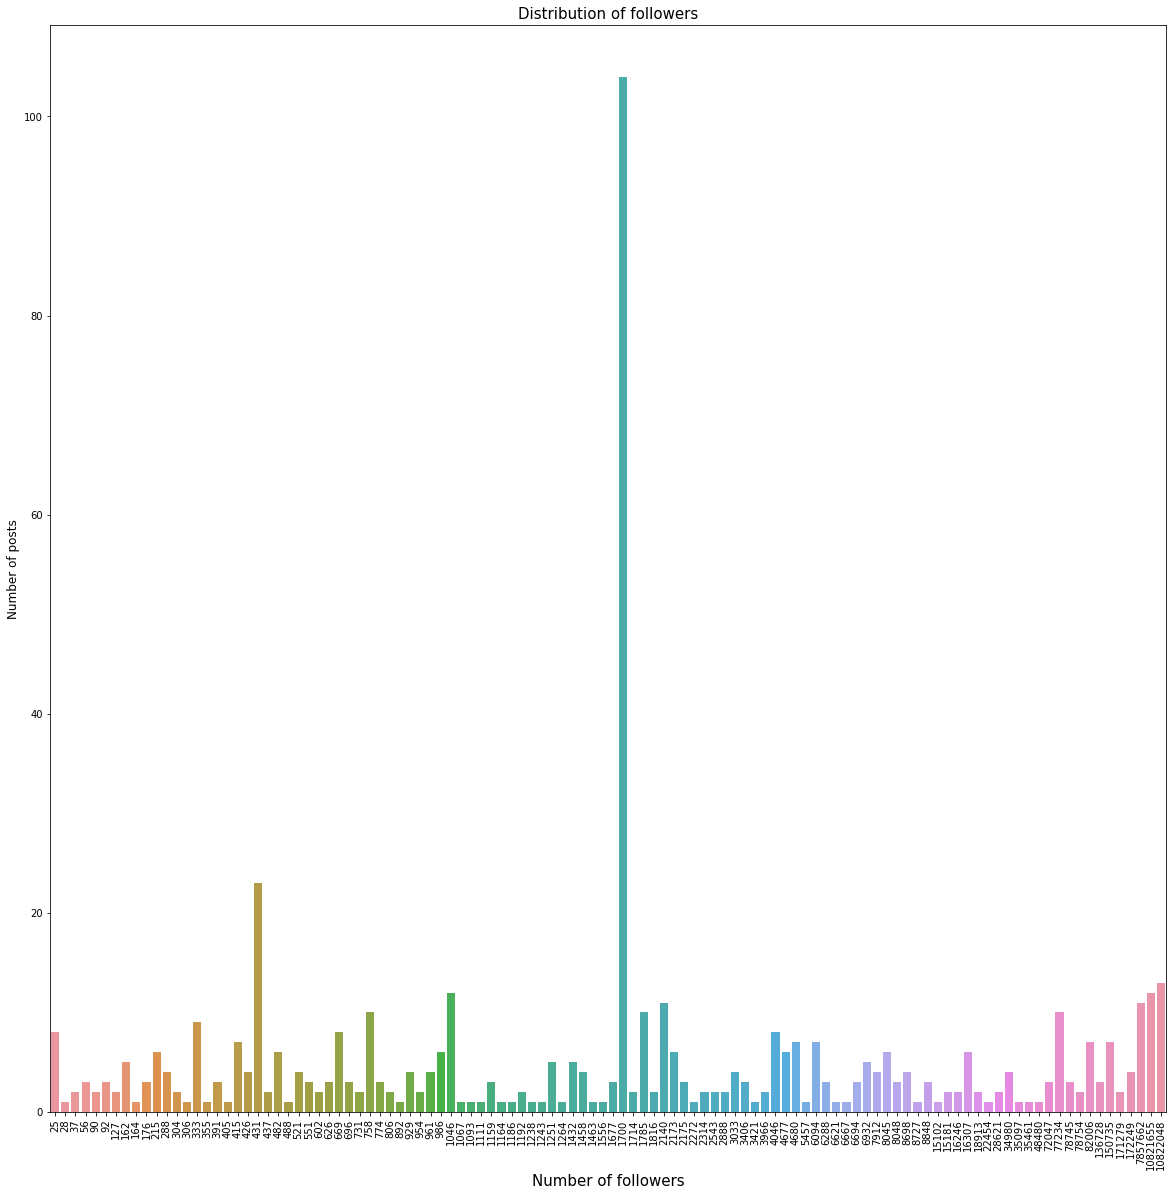

In [217]:
countfollowers=df.followers.value_counts()
plt.figure(figsize=(20,20))
sns.barplot(countfollowers.index,countfollowers.values)
plt.ylabel('Number of posts',fontsize=12)
plt.xlabel('Number of followers',fontsize=15)
plt.title('Distribution of followers',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


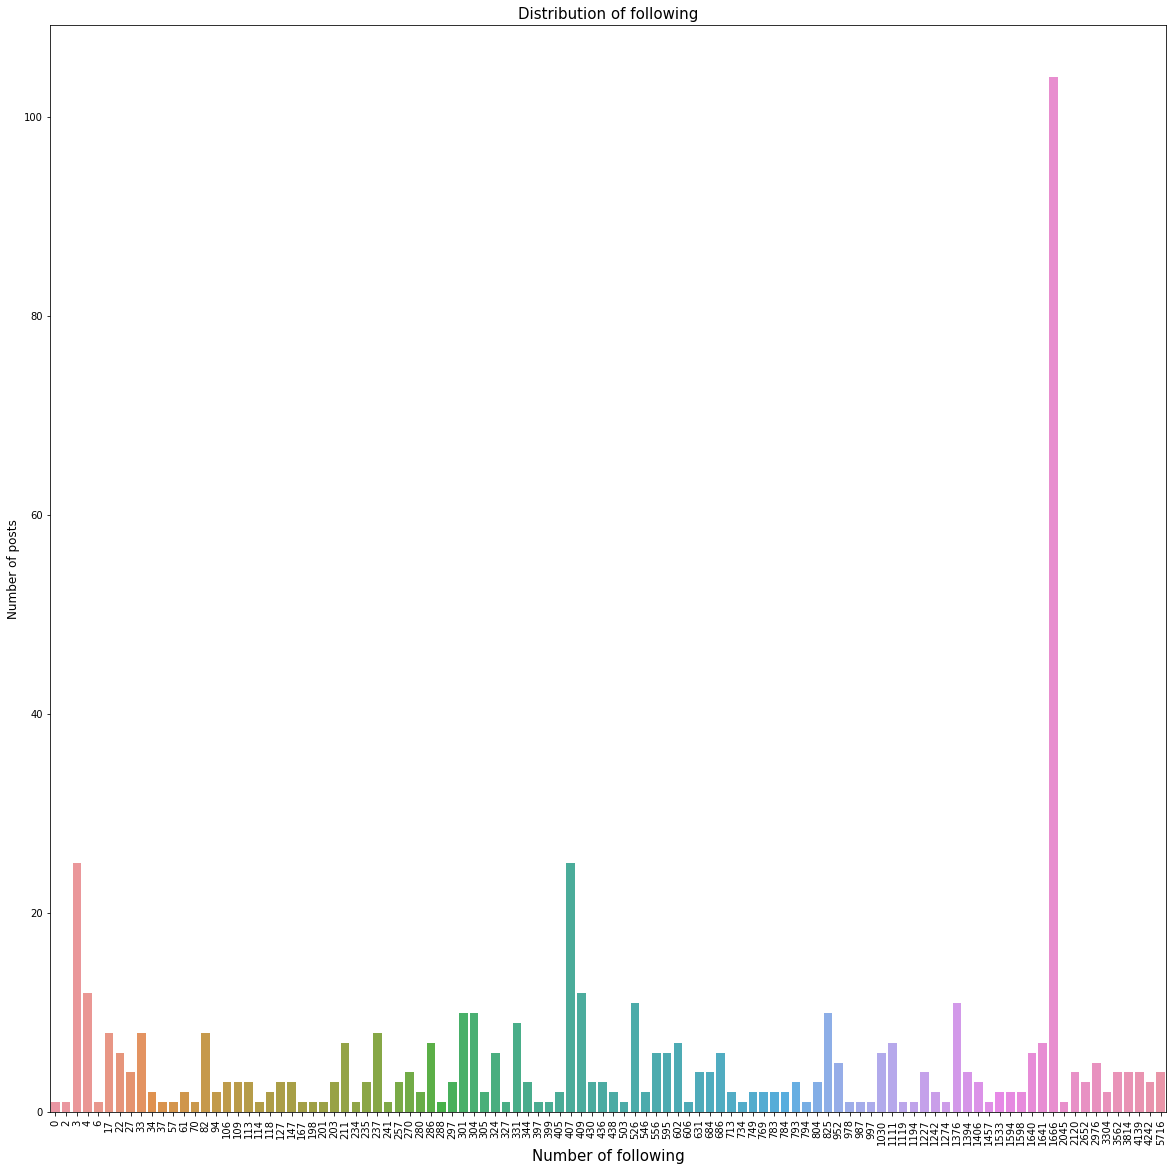

In [297]:
countfollowing=df.following.value_counts()
plt.figure(figsize=(20,20))
sns.barplot(countfollowing.index,countfollowing.values)
plt.ylabel('Number of posts',fontsize=12)
plt.xlabel('Number of following',fontsize=15)
plt.title('Distribution of following',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [296]:
countfollowers=df.followers.value_counts()
countfollowers.index

# df = df.drop(df[df.followers.value_counts()].index<100)

Int64Index([    1700,      431, 10822048, 10821655,     1046,     2140,
             7857662,    77234,      758,     1785,
            ...
                1093,    35461,      355,     1556,    48480,     6621,
                 306,     1186,     5457,       28],
           dtype='int64', length=110)

From this insights we have to remove the the users who have the mega followers & also the users which have very less number of followers.This is because number of followers profoundly effect the ER

In [218]:
# a=df['account'].unique()
# a.size

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb73b6952d0>]],
      dtype=object)

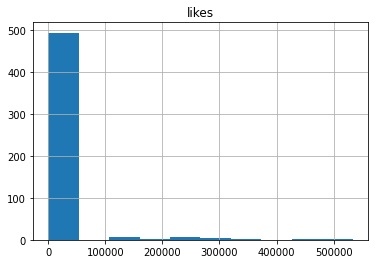

In [255]:
df.hist(column='likes')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb73b82d650>]],
      dtype=object)

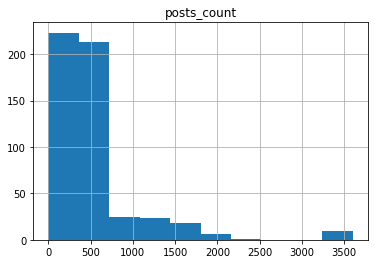

In [256]:
df.hist(column='posts_count')

In [248]:
countlikes=df.groupby("account")["posts_count"].aggregate('max').reset_index()
countlikes

,account,posts_count
0,108harleystreet,28
1,111skin,1381
2,1gemmaclare,313
3,CPMedicalClinic,813
4,CosmeticSurgeonsLondon,1040
...,...,...
103,ucl,985
104,vebleninternational,243
105,viciocassaro,36
106,zafnaqui,599


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


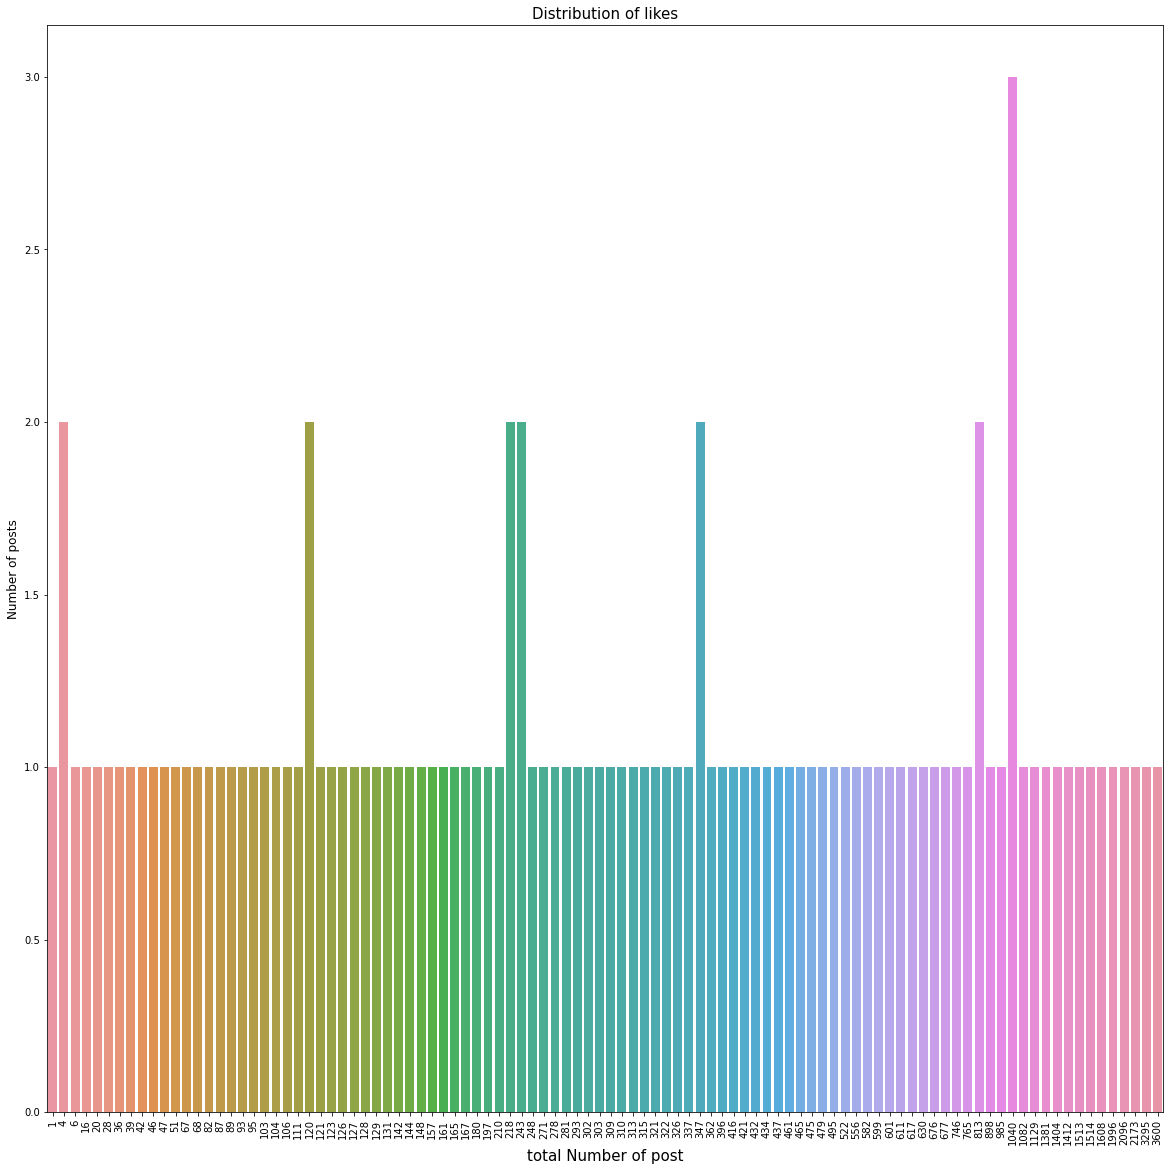

In [242]:
countlikes=df.groupby("account")["posts_count"].aggregate('max').reset_index()
countposts=countlikes.posts_count.value_counts()
plt.figure(figsize=(20,20))
sns.barplot(countposts.index,countposts.values)
plt.ylabel('Number of posts',fontsize=12)
plt.xlabel('total Number of post',fontsize=15)
plt.title('Distribution of likes',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [269]:
countpost=df.groupby("account")["caption"]

account          caption                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
108harleystreet  get back to doing what you do best. \n\ngilmoreâ€™s groin & hernia clinic is structured for the rapid assessment of gilmoreâ€™s groin disruption syndrome and all types of hernias.\n\nto learn more about the procedures, we undertake here at 108 harley street see link in 

In [268]:
countpost=df.groupby("account")["followers"]

countposts=countpost.caption.value_counts()
plt.figure(figsize=(20,20))
sns.barplot(countposts.index,countposts.values)
plt.ylabel('Number of posts',fontsize=12)
plt.xlabel('total Number of post',fontsize=15)
plt.title('Distribution of likes',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

AttributeError: ignored

##Exploration

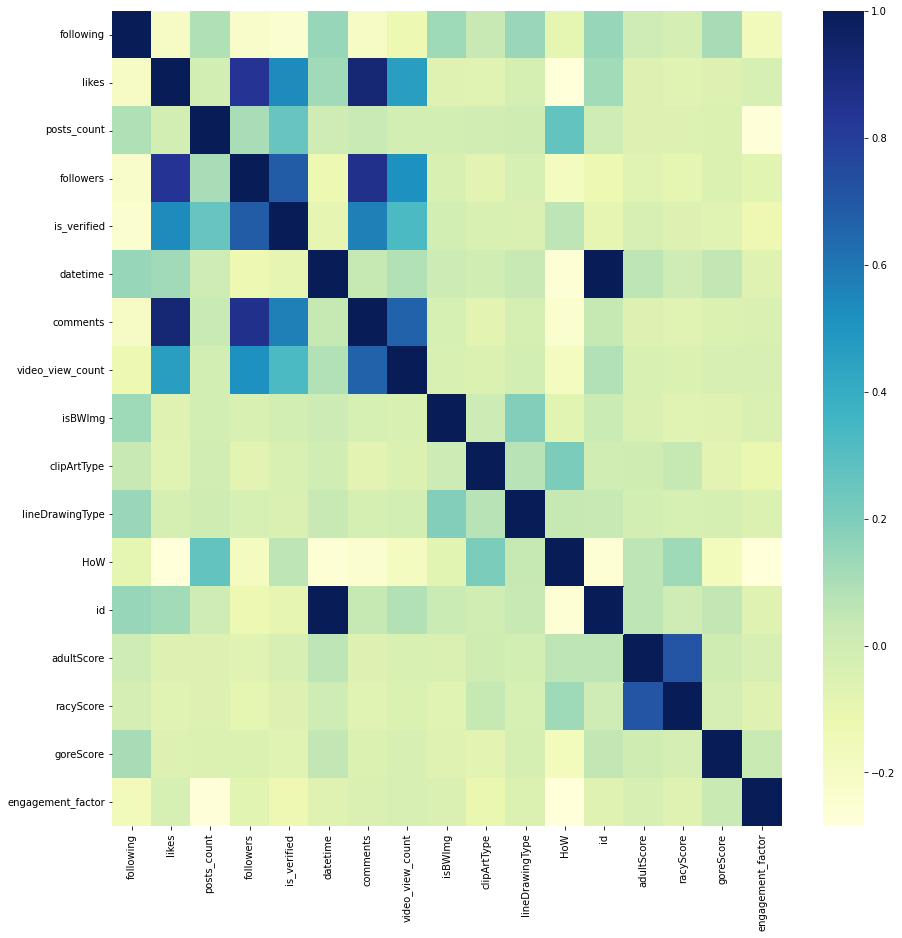

In [586]:
#always remember your magic function if using Jupyter
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),cmap="YlGnBu")
plt.show()

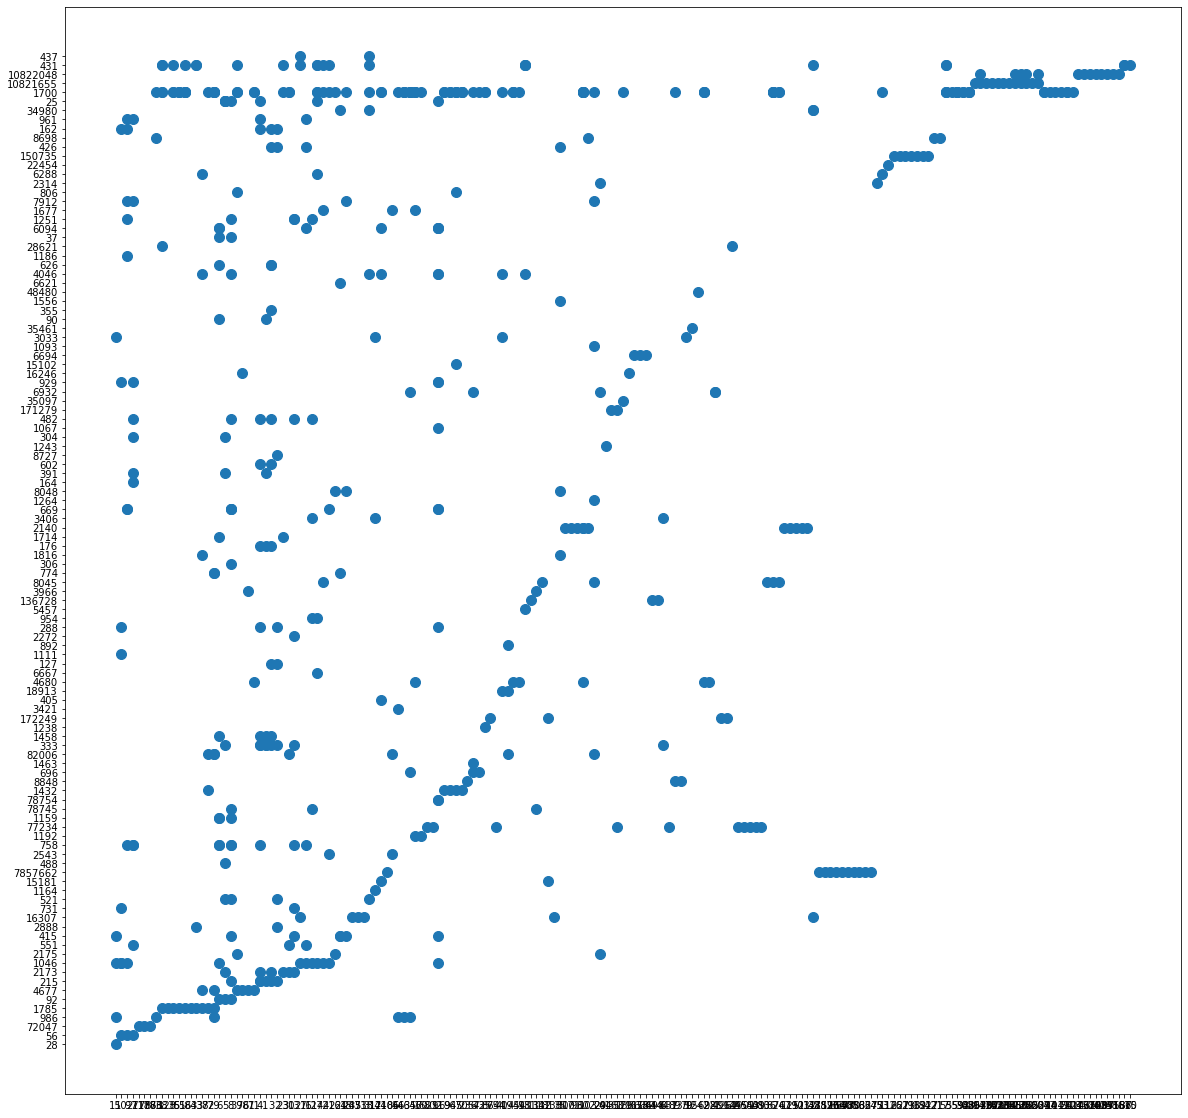

In [662]:
plt.figure(figsize=(20,20))
plt.scatter(df['likes'],df['followers'], s = 100);

#Features Engineering

##Average Likes's Features

In [587]:
df['account'].value_counts().min()

1

In [588]:
df['account'].value_counts().max()

104

In [589]:
average=df.groupby(by=['account','likes'])['Date'].aggregate('max').to_frame('u_timestamp').reset_index()
average

,account,likes,u_timestamp
0,108harleystreet,1,2021-11-02
1,108harleystreet,2,2021-11-02
2,108harleystreet,3,2021-11-02
3,108harleystreet,4,2021-11-02
4,108harleystreet,8,2021-11-02
...,...,...,...
419,viciocassaro,87,2021-11-06
420,zafnaqui,42,2021-11-02
421,zafnaqui,56,2021-11-02
422,zafnaqui,85,2021-11-02


In [590]:
average['account'].value_counts()

cheshirelashcompany    52
spacex                 20
viciocassaro           16
rozinaalimd            11
kevin                  11
                       ..
eudelo                  1
harpalclinic            1
ionkavounilondon        1
keviihospital           1
zelensskincare          1
Name: account, Length: 108, dtype: int64

In [591]:
Average_likes=average.groupby(by=['account'])['likes'].aggregate('mean').to_frame('Average_Likes').reset_index()

In [592]:
Average_likes

,account,Average_Likes
0,108harleystreet,3.600000
1,111skin,206.000000
2,1gemmaclare,94.000000
3,CPMedicalClinic,35.000000
4,CosmeticSurgeonsLondon,50.333333
...,...,...
103,ucl,3151.000000
104,vebleninternational,6.750000
105,viciocassaro,43.750000
106,zafnaqui,61.000000


In [593]:
Average_likes

,account,Average_Likes
0,108harleystreet,3.600000
1,111skin,206.000000
2,1gemmaclare,94.000000
3,CPMedicalClinic,35.000000
4,CosmeticSurgeonsLondon,50.333333
...,...,...
103,ucl,3151.000000
104,vebleninternational,6.750000
105,viciocassaro,43.750000
106,zafnaqui,61.000000


#Recent Likes

In [594]:
recent_likes=average.groupby(by=['account'])['likes'].aggregate('max').to_frame('u_timestamp').reset_index()
recent_likes

,account,u_timestamp
0,108harleystreet,8
1,111skin,296
2,1gemmaclare,94
3,CPMedicalClinic,35
4,CosmeticSurgeonsLondon,131
...,...,...
103,ucl,4444
104,vebleninternational,11
105,viciocassaro,87
106,zafnaqui,85


#Time feature

In [595]:
timefeature=df.groupby(by=['account','Date'])['likes'].aggregate('max').to_frame('time_feature_most_likes_at_timestamp').reset_index()
timefeature.iloc[:]

,account,Date,time_feature_most_likes_at_timestamp
0,108harleystreet,2021-11-02,8
1,111skin,2021-11-02,296
2,1gemmaclare,2021-11-02,94
3,CPMedicalClinic,2021-11-02,35
4,CosmeticSurgeonsLondon,2021-11-02,131
...,...,...,...
103,ucl,2021-11-02,4444
104,vebleninternational,2021-11-02,11
105,viciocassaro,2021-11-06,87
106,zafnaqui,2021-11-02,85


###day of the week user likes the most

In [596]:
#day of the week user likes the most
dow=df.groupby(by=['account','likes'])['Dow'].aggregate(lambda x:stats.mode(x)[0]).to_frame('Dow_u_likes_the_most').reset_index()
dow.iloc[:]
# dow.loc[dow['account'].isin(['lips.london'])]

,account,likes,Dow_u_likes_the_most
0,108harleystreet,1,Tuesday
1,108harleystreet,2,Tuesday
2,108harleystreet,3,Tuesday
3,108harleystreet,4,Tuesday
4,108harleystreet,8,Tuesday
...,...,...,...
419,viciocassaro,87,Saturday
420,zafnaqui,42,Tuesday
421,zafnaqui,56,Tuesday
422,zafnaqui,85,Tuesday


In [597]:
dow_=dow.groupby(by=['account','Dow_u_likes_the_most'])['likes'].aggregate('max').to_frame('DoW_u_most_likes_').reset_index()
dow_
# dow_.loc[dow_['account'].isin(['lips.london'])]

,account,Dow_u_likes_the_most,DoW_u_most_likes_
0,108harleystreet,Tuesday,8
1,111skin,Tuesday,296
2,1gemmaclare,Tuesday,94
3,CPMedicalClinic,Tuesday,35
4,CosmeticSurgeonsLondon,Tuesday,131
...,...,...,...
103,ucl,Tuesday,4444
104,vebleninternational,Tuesday,11
105,viciocassaro,Saturday,87
106,zafnaqui,Tuesday,85


###Hour of the week user likes the most

In [598]:
#HOUR of the week user likes the most
hod=df.groupby(by=['account','likes'])['HoW'].aggregate(lambda x:stats.mode(x)[0]).to_frame('Hod_u_max_likes_hour').reset_index()
hod.iloc[:]
# len(hod.account.unique())

,account,likes,Hod_u_max_likes_hour
0,108harleystreet,1,19
1,108harleystreet,2,19
2,108harleystreet,3,19
3,108harleystreet,4,19
4,108harleystreet,8,19
...,...,...,...
419,viciocassaro,87,16
420,zafnaqui,42,20
421,zafnaqui,56,20
422,zafnaqui,85,20


In [599]:
HoD_=hod.groupby(by=['account'])['likes'].aggregate('max').to_frame('HoD_u_most_like_values')
HoD_

,HoD_u_most_like_values
account,
108harleystreet,8
111skin,296
1gemmaclare,94
CPMedicalClinic,35
CosmeticSurgeonsLondon,131
...,...
ucl,4444
vebleninternational,11
viciocassaro,87


In [600]:
# merged_data= HoD_.merge(hod, on=["account","HoD_u_most_like_values"])

In [601]:
# HoD_ = pd.merge(hod,HoD_,  how='left', left_on=['HoD_u_most_like_values', 'account'], right_on = ['Hod_u_max_likes_hour', 'account'])
# HoD_

# # users=pd.merge(HoD_,hod,on=['account'],how='left')

###Combining all the time features

In [602]:
timefeature=timefeature.merge(dow_,on='account',how='left')
timefeature=timefeature.merge(HoD_,on='account',how='left')
timefeature

,account,Date,time_feature_most_likes_at_timestamp,Dow_u_likes_the_most,DoW_u_most_likes_,HoD_u_most_like_values
0,108harleystreet,2021-11-02,8,Tuesday,8,8
1,111skin,2021-11-02,296,Tuesday,296,296
2,1gemmaclare,2021-11-02,94,Tuesday,94,94
3,CPMedicalClinic,2021-11-02,35,Tuesday,35,35
4,CosmeticSurgeonsLondon,2021-11-02,131,Tuesday,131,131
...,...,...,...,...,...,...
103,ucl,2021-11-02,4444,Tuesday,4444,4444
104,vebleninternational,2021-11-02,11,Tuesday,11,11
105,viciocassaro,2021-11-06,87,Saturday,87,87
106,zafnaqui,2021-11-02,85,Tuesday,85,85


#Engagement factor

In [603]:
engagement_factor=df.groupby(by=['account'])['engagement_factor'].aggregate('max').to_frame('engagement_factor').reset_index()
engagement_factor.iloc[:]

,account,engagement_factor
0,108harleystreet,0.04
1,111skin,0.00
2,1gemmaclare,0.08
3,CPMedicalClinic,0.02
4,CosmeticSurgeonsLondon,0.00
...,...,...
103,ucl,0.03
104,vebleninternational,0.04
105,viciocassaro,0.20
106,zafnaqui,0.05


###combining all the three features into one 

In [604]:
Average_likes=Average_likes.merge(recent_likes,on='account',how='left')
Average_likes=Average_likes.merge(timefeature,on='account',how='left')
Average_likes=Average_likes.merge(engagement_factor,on='account',how='left')

Average_likes

,account,Average_Likes,u_timestamp,Date,time_feature_most_likes_at_timestamp,Dow_u_likes_the_most,DoW_u_most_likes_,HoD_u_most_like_values,engagement_factor
0,108harleystreet,3.600000,8,2021-11-02,8,Tuesday,8,8,0.04
1,111skin,206.000000,296,2021-11-02,296,Tuesday,296,296,0.00
2,1gemmaclare,94.000000,94,2021-11-02,94,Tuesday,94,94,0.08
3,CPMedicalClinic,35.000000,35,2021-11-02,35,Tuesday,35,35,0.02
4,CosmeticSurgeonsLondon,50.333333,131,2021-11-02,131,Tuesday,131,131,0.00
...,...,...,...,...,...,...,...,...,...
103,ucl,3151.000000,4444,2021-11-02,4444,Tuesday,4444,4444,0.03
104,vebleninternational,6.750000,11,2021-11-02,11,Tuesday,11,11,0.04
105,viciocassaro,43.750000,87,2021-11-06,87,Saturday,87,87,0.20
106,zafnaqui,61.000000,85,2021-11-02,85,Tuesday,85,85,0.05


# NLP Text-related features

There are many different features within the dataset that utilize text including biography, hashtags, location, and caption. For the purposes of our project we chose to focus on the caption because we were analyzing independent posts and wanted to use as much information about the post, not the poster, as possible.

In [605]:
!pip install -U textblob
# from textblob import TextBlob

TextBlob returns polarity and subjectivity of a sentence. Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. N

In [606]:
df = df.astype(str)

In [607]:
from textblob import TextBlob


def sentiment_analysis(caption):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(caption):
   return TextBlob(caption).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 df['TextBlob_Subjectivity'] =    df['caption'].apply(getSubjectivity)
 df ['TextBlob_Polarity'] = df['caption'].apply(getPolarity)


 def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


 df ['TextBlob_Analysis'] = df['TextBlob_Polarity'].apply(getAnalysis )
 return df

In [608]:
tex = "man violent happy"
print(sentiment_analysis(tex))

                 account  ... TextBlob_Analysis
0         dr_hazem_alfie  ...           Neutral
1    british_face_clinic  ...          Positive
2    british_face_clinic  ...          Positive
3    british_face_clinic  ...          Positive
4            dr_danmarsh  ...           Neutral
..                   ...  ...               ...
514         viciocassaro  ...          Positive
515         viciocassaro  ...           Neutral
516         viciocassaro  ...           Neutral
517         viciocassaro  ...          Positive
518         viciocassaro  ...           Neutral

[519 rows x 32 columns]


In [609]:
df.dtypes

account                   object
caption                   object
profile_name              object
biography                 object
id                        object
following                 object
likes                     object
posts_count               object
followers                 object
is_verified               object
datetime                  object
image_url                 object
url                       object
comments                  object
video_view_count          object
video_url                 object
timestamp                 object
adultScore                object
racyScore                 object
goreScore                 object
isBWImg                   object
clipArtType               object
lineDrawingType           object
tokens                    object
timstamp_1                object
Dow                       object
HoW                       object
Date                      object
engagement_factor         object
TextBlob_Subjectivity    float64
TextBlob_P

In [610]:
df["caption"][0]

'i am dr hazem alfie, plastic and cosmetic surgeon based in the ukâ€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦ #breastaugmentation #breastenlargemnet #vaserliposuction #vaser #rhinoplasty #abdominoplasty #tummytuck #breastreduction'

In [611]:
# df=df["caption"].apply(lambda text: sentiment_analysis(text))

In [612]:
sentiment_analysis(df["caption"])

,account,caption,profile_name,biography,id,following,likes,posts_count,followers,is_verified,datetime,image_url,url,comments,video_view_count,video_url,timestamp,adultScore,racyScore,goreScore,isBWImg,clipArtType,lineDrawingType,tokens,timstamp_1,Dow,HoW,Date,engagement_factor,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,dr_hazem_alfie,"i am dr hazem alfie, plastic and cosmetic surg...",nan,"j_globe4 london, uk\nn_building6 co-founder ...",2.68e+18,2,15,1,28,0,1634065389,j_kvihwg0g1c283e3byk.0f2035486e2f1b57c59707ec9...,https://www.instagram.com/p/CU8IoDEr-x3/,4,0,nan,2021-11-02T19:40:32.981Z,0.001138492,0.002034143,0.000703198,0,0,0,"['white', 'human', 'face', 'person', 'smile', ...",2021-11-02 19:40:32.981000+00:00,Tuesday,19,2021-11-02,0.54,0.000000,0.000000,Neutral
1,british_face_clinic,british face clinic is offering free facial co...,british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.92e+18,106,10,4,56,0,1542635007,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqXTArshaKO/,0,0,nan,2021-11-02T19:40:36.300Z,0.014004051,0.016998013,0.002984028,0,0,0,"['white', 'grey', 'text', 'human', 'face', 'fa...",2021-11-02 19:40:36.300000+00:00,Tuesday,19,2021-11-02,0.18,0.266667,0.133333,Positive
2,british_face_clinic,"need fuller lips? consider permalipâ„¢\n""lip i...",british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.92e+18,106,9,4,56,0,1543377164,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqtakFwhYpo/,0,0,nan,2021-11-02T19:40:36.300Z,0.002261218,0.01108488,0.011168885,0,0,0,"['white', 'skin', 'lip', 'closeup', 'eyelash',...",2021-11-02 19:40:36.300000+00:00,Tuesday,19,2021-11-02,0.16,0.518590,0.117308,Positive
3,british_face_clinic,a recent successful rhinoplasty procedure resu...,british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.92e+18,106,7,4,56,0,1542967109,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqhMccDBf5z/,1,0,nan,2021-11-02T19:40:36.300Z,0.005520543,0.009230265,0.00092562,0,0,0,"['white', 'grey', 'text', 'screenshot', 'dog',...",2021-11-02 19:40:36.300000+00:00,Tuesday,19,2021-11-02,0.12,0.500000,0.330000,Positive
4,dr_danmarsh,tummytuck at 6 months post op. final results t...,dr dan marsh phd frcs (plast),"j_globe4 london, uk\nn_building6 co-founder ...",2.4e+18,109,2778,309,72047,1,1600373084,j_kvihwg0g1c283e3byk.d165e082aac6a78850c61cecd...,https://www.instagram.com/p/CFQBpv2n2sG/,161,0,nan,2021-11-02T19:40:32.890Z,0.144270137,0.989714026,0.001251557,0,0,0,"['brown', 'black', 'pink', 'undergarment', 'cl...",2021-11-02 19:40:32.890000+00:00,Tuesday,19,2021-11-02,0.04,0.766667,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,viciocassaro,wow.,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",8.71e+17,407,27,36,431,0,1418073537,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/wXE3J1pmXB/,1,0,nan,2021-11-06T17:39:59.077Z,0.00122938,0.002201432,0.000616039,0,0,0,"['grey', 'black', 'outdoor', 'aerial', 'photog...",2021-11-06 17:39:59.077000+00:00,Saturday,17,2021-11-06,0.06,1.000000,0.100000,Positive
515,viciocassaro,ðÿ‘”,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",2.48e+18,407,87,36,431,0,1610199243,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/CJ03kIkj8cH/,0,0,nan,2021-11-06T17:39:59.077Z,0.008393796,0.01121995,0.000873744,0,0,0,"['black', 'person', 'christmas', 'tree', 'clot...",2021-11-06 17:39:59.077000+00:00,Saturday,17,2021-11-06,0.2,0.000000,0.000000,Neutral
516,viciocassaro,#onestepcloser,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",1.03e+18,407,48,36,431,0,1436953461,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/5JvdTIJmWU/,0,0,nan,2021-11-06T17:39:59.077Z,0.000879497,0.001614613,0.

In [613]:
df=df.merge(Average_likes,on='account',how='left')
df

,account,caption,profile_name,biography,id,following,likes,posts_count,followers,is_verified,datetime,image_url,url,comments,video_view_count,video_url,timestamp,adultScore,racyScore,goreScore,isBWImg,clipArtType,lineDrawingType,tokens,timstamp_1,Dow,HoW,Date_x,engagement_factor_x,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,Average_Likes,u_timestamp,Date_y,time_feature_most_likes_at_timestamp,Dow_u_likes_the_most,DoW_u_most_likes_,HoD_u_most_like_values,engagement_factor_y
0,dr_hazem_alfie,"i am dr hazem alfie, plastic and cosmetic surg...",nan,"j_globe4 london, uk\nn_building6 co-founder ...",2.68e+18,2,15,1,28,0,1634065389,j_kvihwg0g1c283e3byk.0f2035486e2f1b57c59707ec9...,https://www.instagram.com/p/CU8IoDEr-x3/,4,0,nan,2021-11-02T19:40:32.981Z,0.001138492,0.002034143,0.000703198,0,0,0,"['white', 'human', 'face', 'person', 'smile', ...",2021-11-02 19:40:32.981000+00:00,Tuesday,19,2021-11-02,0.54,0.000000,0.000000,Neutral,15.000000,15,2021-11-02,15,Tuesday,15,15,0.54
1,british_face_clinic,british face clinic is offering free facial co...,british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.92e+18,106,10,4,56,0,1542635007,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqXTArshaKO/,0,0,nan,2021-11-02T19:40:36.300Z,0.014004051,0.016998013,0.002984028,0,0,0,"['white', 'grey', 'text', 'human', 'face', 'fa...",2021-11-02 19:40:36.300000+00:00,Tuesday,19,2021-11-02,0.18,0.266667,0.133333,Positive,8.666667,10,2021-11-02,10,Tuesday,10,10,0.18
2,british_face_clinic,"need fuller lips? consider permalipâ„¢\n""lip i...",british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.92e+18,106,9,4,56,0,1543377164,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqtakFwhYpo/,0,0,nan,2021-11-02T19:40:36.300Z,0.002261218,0.01108488,0.011168885,0,0,0,"['white', 'skin', 'lip', 'closeup', 'eyelash',...",2021-11-02 19:40:36.300000+00:00,Tuesday,19,2021-11-02,0.16,0.518590,0.117308,Positive,8.666667,10,2021-11-02,10,Tuesday,10,10,0.18
3,british_face_clinic,a recent successful rhinoplasty procedure resu...,british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.92e+18,106,7,4,56,0,1542967109,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqhMccDBf5z/,1,0,nan,2021-11-02T19:40:36.300Z,0.005520543,0.009230265,0.00092562,0,0,0,"['white', 'grey', 'text', 'screenshot', 'dog',...",2021-11-02 19:40:36.300000+00:00,Tuesday,19,2021-11-02,0.12,0.500000,0.330000,Positive,8.666667,10,2021-11-02,10,Tuesday,10,10,0.18
4,dr_danmarsh,tummytuck at 6 months post op. final results t...,dr dan marsh phd frcs (plast),"j_globe4 london, uk\nn_building6 co-founder ...",2.4e+18,109,2778,309,72047,1,1600373084,j_kvihwg0g1c283e3byk.d165e082aac6a78850c61cecd...,https://www.instagram.com/p/CFQBpv2n2sG/,161,0,nan,2021-11-02T19:40:32.890Z,0.144270137,0.989714026,0.001251557,0,0,0,"['brown', 'black', 'pink', 'undergarment', 'cl...",2021-11-02 19:40:32.890000+00:00,Tuesday,19,2021-11-02,0.04,0.766667,0.000000,Neutral,1916.000000,2778,2021-11-02,2778,Tuesday,2778,2778,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,viciocassaro,wow.,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",8.71e+17,407,27,36,431,0,1418073537,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/wXE3J1pmXB/,1,0,nan,2021-11-06T17:39:59.077Z,0.00122938,0.002201432,0.000616039,0,0,0,"['grey', 'black', 'outdoor', 'aerial', 'photog...",2021-11-06 17:39:59.077000+00:00,Saturday,17,2021-11-06,0.06,1.000000,0.100000,Positive,43.750000,87,2021-11-06,87,Saturday,87,87,0.20
515,viciocassaro,ðÿ‘”,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",2.48e+18,407,87,36,431,0,1610199243,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/CJ03kIkj8cH/,0,0,nan,2021-11-06T17:39

In [633]:
# df = remove_html(df['caption'][0])
df["hashtags"] = df["caption"].apply(lambda text: hashtag_extract(text))

In [647]:
df["caption"][0]

'i am dr hazem alfie, plastic and cosmetic surgeon based in the ukâ€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦ #breastaugmentation #breastenlargemnet #vaserliposuction #vaser #rhinoplasty #abdominoplasty #tummytuck #breastreduction'

In [634]:
df['hashtags']

0      [breastaugmentation, breastenlargemnet, vaserl...
1      [facialcosmeticsurgery, rhinoplasty, facelift,...
2      [permalip, lips, cosmeticsurgery, lipinjection...
3      [facialcosmeticsurgery, rhinoplasty, rhinoplas...
4                                            [bodybydan]
                             ...                        
514                                                   []
515                                                   []
516                                      [onestepcloser]
517                                                   []
518                                             [repost]
Name: hashtags, Length: 519, dtype: object

Text(0, 0.5, 'Count')

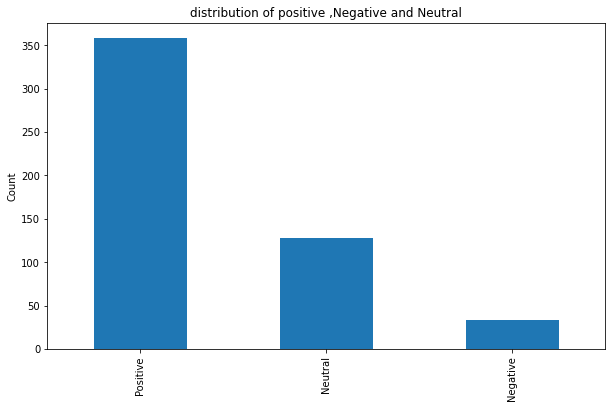

In [537]:
ax=df['TextBlob_Analysis'].value_counts().plot(kind='bar',figsize=(10,6),title="distribution of positive ,Negative and Neutral")
ax.set_ylabel("Count")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each caption')

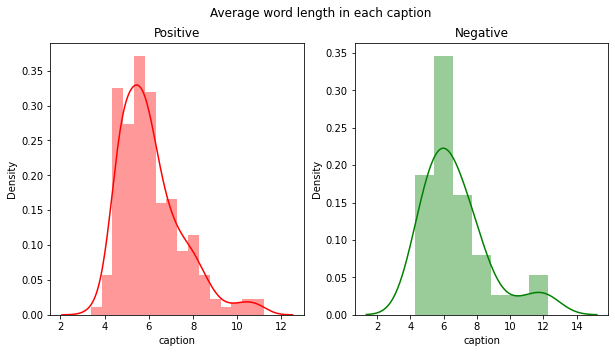

In [678]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df[df['TextBlob_Analysis']=='Positive']['caption'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Positive')
word=df[df['TextBlob_Analysis']=='Negative']['caption'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Negative')
fig.suptitle('Average word length in each caption')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each caption')

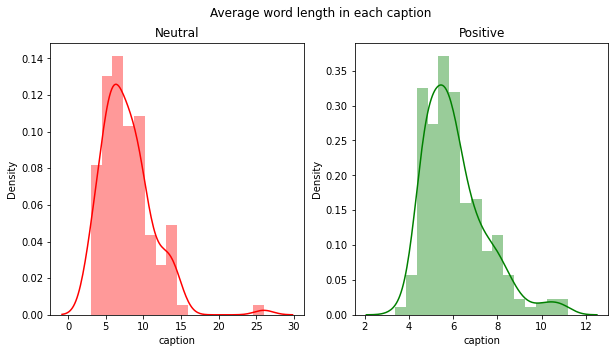

In [679]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df[df['TextBlob_Analysis']=='Neutral']['caption'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Neutral')
word=df[df['TextBlob_Analysis']=='Positive']['caption'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Positive')
fig.suptitle('Average word length in each caption')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each caption')

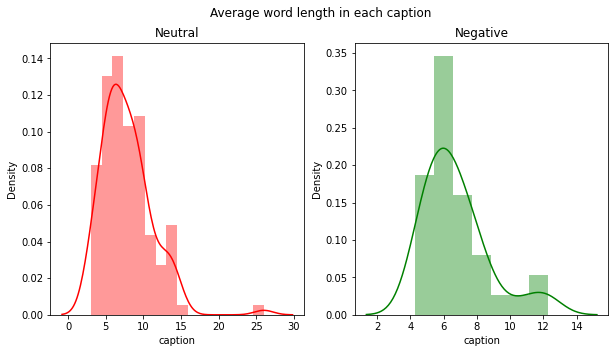

In [680]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df[df['TextBlob_Analysis']=='Neutral']['caption'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Neutral')
word=df[df['TextBlob_Analysis']=='Negative']['caption'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Negative')
fig.suptitle('Average word length in each caption')

#Visualizing Hashtags

A Python package for online marketing productivity and analysis. You can learn more about it in the GitHub repo, and it can easily be installed by running:

In [667]:
!pip install advertools
import advertools as adv

     |████████████████████████████████| 279 kB 5.0 MB/s 
     |████████████████████████████████| 254 kB 36.4 MB/s 
     |████████████████████████████████| 65 kB 2.6 MB/s 
     |████████████████████████████████| 3.6 MB 51.4 MB/s 
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 3.2 MB 42.3 MB/s 
     |████████████████████████████████| 47 kB 2.8 MB/s 
     |████████████████████████████████| 3.1 MB 50.6 MB/s 
     |████████████████████████████████| 251 kB 66.7 MB/s 
     |████████████████████████████████| 74 kB 2.4 MB/s 
  Created wheel for protego: filename=Protego-0.1.16-py3-none-any.whl size=7783 sha256=c6ff40bf10f62e66de4294485606c6b020741553ca01f63a4f9a306492cf369a
  Stored in directory: /root/.cache/pip/wheels/ca/44/01/3592ccfbcfaee4ab297c4097e6e9dbe1c7697e3531a39877ab
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-py3-none-any.whl size=11516 sha256=6111ee9718374ab73fac2e882340f505eceba4ad04916d15b707df3fff0463b7
  Stored

Let's start by extracting the hashtags.



In [668]:
hashtag_summary = adv.extract_hashtags(df['caption'])
hashtag_summary.keys()

dict_keys(['hashtags', 'hashtags_flat', 'hashtag_counts', 'hashtag_freq', 'top_hashtags', 'overview'])

The most general one to get a quick idea about the data is the overview key.
This shows us how many posts we have, the total number of hashtags (or mentions, or emoji), the average number of hashtags per post, and the number of unique hashtags.

In [669]:
hashtag_summary['overview']

{'hashtags_per_post': 6.753371868978806,
 'num_hashtags': 3505,
 'num_posts': 519,
 'unique_hashtags': 1696}

Next, we can explore the extracted hashtags themselves. Here we are looking at the first ten.
As you can see for each post we get a list of hashtags. We get an empty list wherever there are no hashtags in the tweet.

In [670]:
hashtag_summary['hashtags'][:10]

[['#breastaugmentation',
  '#breastenlargemnet',
  '#vaserliposuction',
  '#vaser',
  '#rhinoplasty',
  '#abdominoplasty',
  '#tummytuck',
  '#breastreduction'],
 ['#facialcosmeticsurgery',
  '#rhinoplasty',
  '#facelift',
  '#london',
  '#miltonkeynes',
  '#northampton',
  '#birmingham',
  '#facialplasticsurgeon',
  '#bfc'],
 ['#permalip',
  '#lips',
  '#cosmeticsurgery',
  '#lipinjections',
  '#lipenhancement',
  '#bfc'],
 ['#facialcosmeticsurgery',
  '#rhinoplasty',
  '#rhinoplastybeforeandafter',
  '#surgery',
  '#miltonkeynes',
  '#northampton',
  '#london',
  '#birmingham'],
 ['#bodybydan'],
 ['#breastsbydan'],
 ['#bodybydan'],
 ['#rhinoplasty',
  '#septorhinoplasty',
  '#tipplasty',
  '#nosejob',
  '#humpreduction',
  '#smallernose',
  '#londonrhinoplasty',
  '#harleystreetrhinoplasty',
  '#londonrhinoplasty',
  '#thelondonrhinoplastyclinic',
  '#rhinoplastyexpert',
  '#rhinoplastypreandpost',
  '#rhinoplastybeforeandafterphotos'],
 ['#â',
  '#nyc',
  '#tulips',
  '#yellowcab',


Next, we take a look at the flattened list of hashtags. hashtags_flat is the name of this list and it basically is a single-dimensional list of all the available hashtags.
This is convenient if you want to do aggregate analysis on the whole set of hashtags.

In [671]:
hashtag_summary['hashtags_flat'][:10]

['#breastaugmentation',
 '#breastenlargemnet',
 '#vaserliposuction',
 '#vaser',
 '#rhinoplasty',
 '#abdominoplasty',
 '#tummytuck',
 '#breastreduction',
 '#facialcosmeticsurgery',
 '#rhinoplasty']

The count of hashtags for each tweet is given by the hashtag_counts key.
Later, we will combine all these in one DataFrame and do further analysis on them

In [672]:
hashtag_summary['hashtag_counts'][:20]

[8, 9, 6, 8, 1, 1, 1, 13, 14, 12, 13, 24, 17, 15, 11, 16, 26, 16, 11, 8]

It is also interesting to know the frequency of using hashtags in this data set.
The hashtag_freq key shows us the number of tweets containing 1, 2, 3, etc hashtags.

In [673]:
hashtag_summary['hashtag_freq'][:15]

[(0, 205),
 (1, 42),
 (2, 27),
 (3, 14),
 (4, 20),
 (5, 14),
 (6, 10),
 (7, 10),
 (8, 13),
 (9, 10),
 (10, 16),
 (11, 10),
 (12, 10),
 (13, 11),
 (14, 7)]

Visualizing the frequencies to get a better overview of how they are distributed, we plot the top fifteen frequencies:

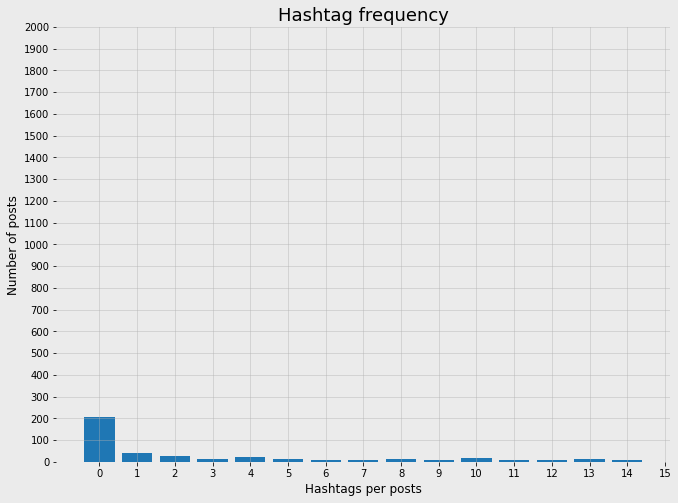

In [675]:
plt.figure(facecolor='#ebebeb', figsize=(11, 8))
plt.bar([x[0] for x in hashtag_summary['hashtag_freq'][:15]],
        [x[1] for x in hashtag_summary['hashtag_freq'][:15]])
plt.title('Hashtag frequency', fontsize=18)
plt.xlabel('Hashtags per posts', fontsize=12)
plt.ylabel('Number of posts', fontsize=12)
plt.xticks(range(16))
plt.yticks(range(0, 2100, 100))
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

You are probably wonderig which are the top hashtags

In [676]:
hashtag_summary['top_hashtags'][:10]

[('#cosmeticsurgery', 36),
 ('#plasticsurgery', 34),
 ('#london', 33),
 ('#beauty', 30),
 ('#aesthetics', 27),
 ('#skincare', 25),
 ('#harleystreet', 25),
 ('#plasticsurgeon', 23),
 ('#rhinoplasty', 18),
 ('#botox', 18)]

Visualizing the same data

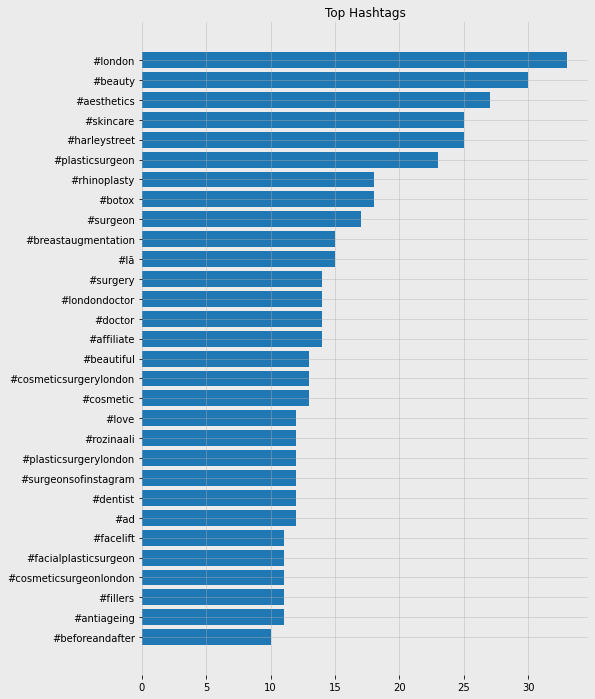

In [677]:
plt.figure(facecolor='#ebebeb', figsize=(8, 12))
plt.barh([x[0] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1],
         [x[1] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1])
plt.title('Top Hashtags')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

#Emoji's

You will see that the extract_emoji function is pretty much the same as extract_hashtags. The only difference is that it has emoji both as images and their textual counterparts.

In [682]:
emoji_summary = adv.extract_emoji(df['caption'])
emoji_summary.keys()

dict_keys(['emoji', 'emoji_text', 'emoji_flat', 'emoji_flat_text', 'emoji_counts', 'emoji_freq', 'top_emoji', 'top_emoji_text', 'top_emoji_groups', 'top_emoji_sub_groups', 'overview'])

In [683]:
emoji_summary['overview']

{'emoji_per_post': 0.9479768786127167,
 'num_emoji': 492,
 'num_posts': 519,
 'unique_emoji': 3}

In [684]:
emoji_summary['emoji'][:20]

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['™', '™'],
 []]

In [685]:
emoji_summary['emoji_text'][:20]

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['trade mark', 'trade mark'],
 []]

In [686]:
emoji_summary['emoji_flat'][:10]

['™', '™', '™', '™', '™', '™', '™', '™', '™', '™']

In [687]:
emoji_summary['emoji_flat_text'][:10]

['trade mark',
 'trade mark',
 'trade mark',
 'trade mark',
 'trade mark',
 'trade mark',
 'trade mark',
 'trade mark',
 'trade mark',
 'trade mark']

In [688]:
list(zip(emoji_summary['emoji_flat'][:10], emoji_summary['emoji_flat_text'][:10]))

[('™', 'trade mark'),
 ('™', 'trade mark'),
 ('™', 'trade mark'),
 ('™', 'trade mark'),
 ('™', 'trade mark'),
 ('™', 'trade mark'),
 ('™', 'trade mark'),
 ('™', 'trade mark'),
 ('™', 'trade mark'),
 ('™', 'trade mark')]

In [689]:
emoji_summary['emoji_counts'][:15]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [690]:
emoji_summary['emoji_freq'][:15]

[(0, 333),
 (1, 114),
 (2, 35),
 (3, 7),
 (4, 16),
 (5, 2),
 (6, 3),
 (7, 1),
 (8, 3),
 (10, 1),
 (18, 1),
 (22, 1),
 (50, 1),
 (64, 1)]

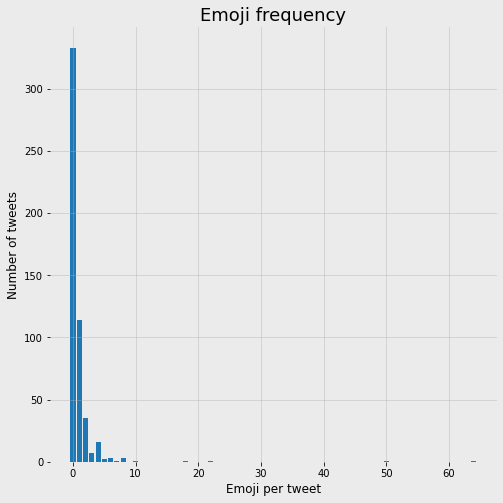

In [691]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.bar([x[0] for x in emoji_summary['emoji_freq'][:15]],
        [x[1] for x in emoji_summary['emoji_freq'][:15]])
plt.title('Emoji frequency', fontsize=18)
plt.xlabel('Emoji per post', fontsize=12)
plt.ylabel('Number of post', fontsize=12)
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [692]:
emoji_summary['top_emoji'][:20]

[('™', 410), ('©', 57), ('®', 25)]

In [693]:
emoji_summary['top_emoji_text'][:20]

[('trade mark', 410), ('copyright', 57), ('registered', 25)]

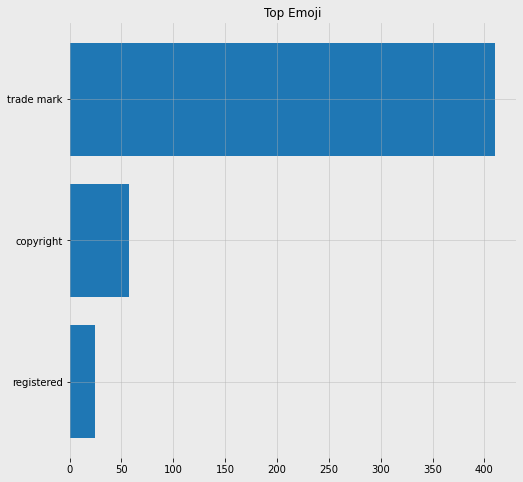

In [694]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.barh([x[0] for x in emoji_summary['top_emoji_text'][:20]][::-1],
         [x[1] for x in emoji_summary['top_emoji_text'][:20]][::-1])
plt.title('Top Emoji')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

#mentions

In [695]:
mention_summary = adv.extract_mentions(df['caption'])
mention_summary.keys()

dict_keys(['mentions', 'mentions_flat', 'mention_counts', 'mention_freq', 'top_mentions', 'overview'])

In [696]:
mention_summary['overview']

{'mentions_per_post': 0.4682080924855491,
 'num_mentions': 243,
 'num_posts': 519,
 'unique_mentions': 125}

In [697]:
mention_summary['mentions'][:15]

[[], [], [], [], [], [], [], [], [], [], ['@stayinglevel'], [], [], [], []]

In [698]:
mention_summary['mentions_flat'][:10]

['@stayinglevel',
 '@coolsculpting',
 '@hydrafacial',
 '@cosmeticnurse_mariam',
 '@hydrafacial',
 '@hydrafacial',
 '@sciton_inc',
 '@doctify',
 '@remaybeauty',
 '@gettymuseum']

In [699]:
mention_summary['mention_counts'][:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [700]:
mention_summary['mention_freq'][:15]

[(0, 389), (1, 87), (2, 24), (3, 9), (5, 4), (6, 3), (10, 1), (15, 1), (18, 1)]

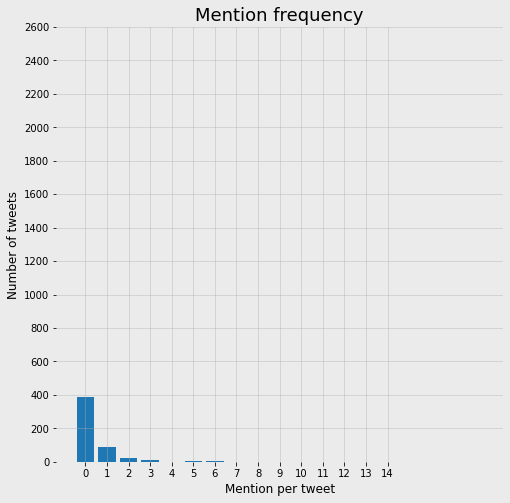

In [701]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.bar([x[0] for x in mention_summary['mention_freq'][:15]],
        [x[1] for x in mention_summary['mention_freq'][:15]])
plt.title('Mention frequency', fontsize=18)
plt.xlabel('Mention per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.xticks(range(15))
plt.yticks(range(0, 2800, 200))
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [702]:
mention_summary['top_mentions'][:10]

[('@officialnavyprotools', 21),
 ('@officialnavyprofessional', 16),
 ('@drdominicbray', 10),
 ('@nouveaulashespro', 8),
 ('@inspiration4', 6),
 ('@facerestorationlondon', 5),
 ('@drjonathanroos', 5),
 ('@drrachna_murthy', 5),
 ('@phoenixhospitalgroup', 5),
 ('@onewelbeck', 5)]

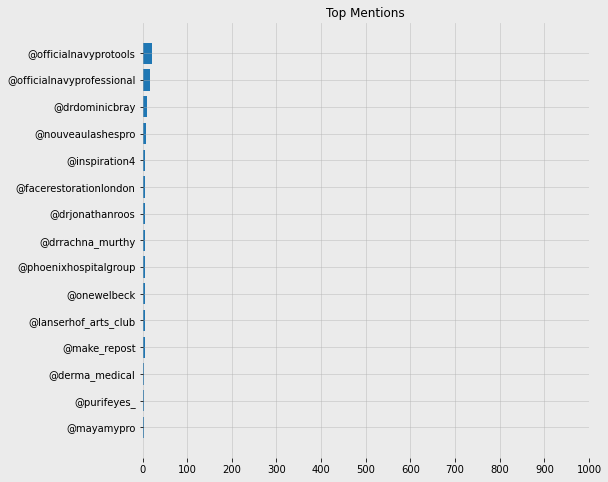

In [703]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.barh([x[0] for x in mention_summary['top_mentions'][:15]][::-1],
         [x[1] for x in mention_summary['top_mentions'][:15]][::-1])
plt.title('Top Mentions')
plt.grid(alpha=0.5)
plt.xticks(range(0, 1100, 100))
plt.gca().set_frame_on(False)

#Questions

In [706]:
question_summary = adv.extract_questions(df['caption'])

In [707]:
question_summary.keys()

dict_keys(['question_marks', 'question_marks_flat', 'question_mark_counts', 'question_mark_freq', 'top_question_marks', 'overview', 'question_mark_names', 'question_text'])

In [708]:
question_summary['overview']

{'num_posts': 519,
 'num_question_marks': 92,
 'question_marks_per_post': 0.17726396917148363,
 'unique_question_marks': 2}

In [709]:
question_summary['question_mark_freq']

[(0, 461), (1, 46), (2, 5), (3, 3), (4, 1), (7, 1), (8, 2)]

In [710]:
question_summary['top_question_marks'] # this is more interesting if you have questions in different languages where different question marks are used.

[('?', 58), ('¿', 34)]

In [711]:
[(i,x) for i, x in  enumerate(question_summary['question_text']) if x][:15]

[(2, ['need fuller lips?']),
 (19, ['czy znasz juå¼ pakiet mama i ja?']),
 (22, ['spooky season?']),
 (33,
  ['what has a heart, gives you massages and kisses your skin in the morning?']),
 (42, ['are you looking for a subtle lip filler to enhance lips?']),
 (47,
  ['the combination of fat transfer & breast lift surgery was the perfect match for my client - no more sagging breast for her ðÿ¤©\nwhat do you think of this before & after?']),
 (60,
  ['did you know that having an acidic environment in our bodies leads to inflammation and free radical damage, which then leads to wrinkles and ageing?']),
 (65,
  ['did you know we also offer video consultations, so you can learn more about your surgery and have your questions answered from the comfort and privacy of your home?']),
 (66, ['could it be your eyes, your mouth or the way that you smile?']),
 (69, ['did you hear?']),
 (87,
  ['i know these arenâ€™t clinical views in the same position or lighting but you know what?']),
 (91, ['can a

#Intense Words

In [713]:
intense_summary = adv.extract_intense_words(df['caption'], min_reps=3)

In [714]:
intense_summary['overview']

{'intense_words_per_post': 0.27167630057803466,
 'num_intense_words': 141,
 'num_posts': 519,
 'unique_intense_words': 83}

In [715]:
intense_summary['top_intense_words'][:20]

[('www.dominicbray.com', 10),
 ('www.dermamedical.co.uk', 8),
 ('#111skin', 7),
 ('www.dermamedical.se', 6),
 ('www.dermamedical.ae', 6),
 ('www.dermamedical.net.au', 6),
 ('-----------', 5),
 ('07851407774', 3),
 ('111â', 3),
 ('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~', 3),
 ('~~~~~~~~~~~~~~~~~~~~~~~~', 3),
 ('111', 3),
 ('________________________________________________________â', 3),
 ('111skin.com', 3),
 ('â£15-25,000', 2),
 ('how....', 2),
 ('www.dermamedical.pt', 2),
 ('#fallleaves', 1),
 ('http://www.green-surgery.com/pakiety-i-promocje/londyn/aktualne-promocje/',
  1),
 ('harder...', 1)]

#Currency Symbols

In [717]:
currency_summary = adv.extract_currency(df['caption'])

In [718]:
currency_summary.keys()

dict_keys(['currency_symbols', 'currency_symbols_flat', 'currency_symbol_counts', 'currency_symbol_freq', 'top_currency_symbols', 'overview', 'currency_symbol_names', 'surrounding_text'])

In [719]:
currency_summary['overview']

{'currency_symbols_per_post': 2.1464354527938343,
 'num_currency_symbols': 1114,
 'num_posts': 519,
 'unique_currency_symbols': 6}

In [720]:
currency_summary['top_currency_symbols']

[('€', 663), ('£', 131), ('¤', 126), ('¢', 115), ('¥', 72), ('$', 7)]

In [721]:
[x for x in currency_summary['surrounding_text'] if x][:20]

[['eon based in the ukâ€¦â€¦â€¦â€¦â€¦â€¦â€¦â',
  '€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦â',
  '€¦â€¦â€¦â€¦â€¦â€¦â€¦â€¦ #breastaugmenta'],
 [' consider permalipâ„¢',
  'lers, these do not â€œvanishâ€� away with',
  'ifferent thickness â€“ 3mm, 4 mm and 5 mm',
  ' different lengths â€“ 55mm,60mm and 65 m'],
 ['donâ€™t forget we are off', 'â€¢', 'â€¢', 'â€¢'],
 ['season? no way - itâ€™s hydrafacial seaso'],
 ['â€¢', 'â€¢', 'â€¢'],
 ['â€¢', 'â€¢', 'â€¢'],
 ['gilmoreâ€™s groin & hernia cl',
  'sessment of gilmoreâ€™s groin disruption '],
 [' and your loved oneâ€™s detect abnormalit'],
 ['smooth shave so youâ€™re ready to go in n'],
 [' day should be sunâ˜€ï¸�day #remayshave #'],
 ['mentation results â�¤ï¸�'],
 ['o superpower...ðÿ¦¸â€�â™€ï¸�'],
 ['â€�ð�˜�ð�˜§ ð�˜ºð�˜°ð�',
  '˜¶ ð�˜¢ð�˜³ð�˜¦ ð�˜´ð�˜¤ð�˜',
  '¦ð�˜±ð�˜µð�˜ªð�˜¤ð�˜¢ð�˜\xad ð�˜¸ð�˜©ð�˜¦ð�˜',
  '¯ ð�˜ªð�˜µ ð�˜¤ð�˜°ð�˜®ð�˜¦ð�˜´ ð�˜',
  'ð�˜©ð�˜¦ð�˜¯ ð�™¡ð�™¤ð�™¤ð�™\xa0 ð�™£ð�™¤ ð�',
  'ð�™ªð�™¨ð�™š ð�™�ð�™¤ð�™¯ð�™žð�™£ð�™– ð�™',
  

In [731]:
extracted_posts =  (df[['account','caption','profile_name',	'biography','id','following',	'likes','posts_count','followers'	,'is_verified',	'datetime'	,'image_url'	,'url'	,'comments',	'video_view_count'	,'video_url',	'timestamp',	'adultScore',	'racyScore'	,'goreScore'	,'isBWImg',	'clipArtType'	,'lineDrawingType',	'tokens',	'timstamp_1',	'Dow',	'HoW',	'Date_x',	'engagement_factor_x','TextBlob_Subjectivity',	'TextBlob_Polarity'	,'TextBlob_Analysis',	'Average_Likes'	,'u_timestamp'	,'Date_y'	,'time_feature_most_likes_at_timestamp',	'Dow_u_likes_the_most',	'DoW_u_most_likes_',	'HoD_u_most_like_values'	,'engagement_factor_y']]
 .assign(hashtags=hashtag_summary['hashtags'],
         hashcounts=hashtag_summary['hashtag_counts'],
         mentions=mention_summary['mentions'],
         mention_count=mention_summary['mention_counts'],
         emoji=emoji_summary['emoji'],
         emoji_text=emoji_summary['emoji_text'],
         emoji_count=emoji_summary['emoji_counts'],))
extracted_posts.head()

,account,caption,profile_name,biography,id,following,likes,posts_count,followers,is_verified,datetime,image_url,url,comments,video_view_count,video_url,timestamp,adultScore,racyScore,goreScore,isBWImg,clipArtType,lineDrawingType,tokens,timstamp_1,Dow,HoW,Date_x,engagement_factor_x,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,Average_Likes,u_timestamp,Date_y,time_feature_most_likes_at_timestamp,Dow_u_likes_the_most,DoW_u_most_likes_,HoD_u_most_like_values,engagement_factor_y,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count
0,dr_hazem_alfie,"i am dr hazem alfie, plastic and cosmetic surg...",nan,"j_globe4 london, uk\nn_building6 co-founder ...",2.68e+18,2,15,1,28,0,1634065389,j_kvihwg0g1c283e3byk.0f2035486e2f1b57c59707ec9...,https://www.instagram.com/p/CU8IoDEr-x3/,4,0,nan,2021-11-02T19:40:32.981Z,0.001138492,0.002034143,0.000703198,0,0,0,"['white', 'human', 'face', 'person', 'smile', ...",2021-11-02 19:40:32.981000+00:00,Tuesday,19,2021-11-02,0.54,0.000000,0.000000,Neutral,15.000000,15,2021-11-02,15,Tuesday,15,15,0.54,"[#breastaugmentation, #breastenlargemnet, #vas...",8,[],0,[],[],0
1,british_face_clinic,british face clinic is offering free facial co...,british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.92e+18,106,10,4,56,0,1542635007,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqXTArshaKO/,0,0,nan,2021-11-02T19:40:36.300Z,0.014004051,0.016998013,0.002984028,0,0,0,"['white', 'grey', 'text', 'human', 'face', 'fa...",2021-11-02 19:40:36.300000+00:00,Tuesday,19,2021-11-02,0.18,0.266667,0.133333,Positive,8.666667,10,2021-11-02,10,Tuesday,10,10,0.18,"[#facialcosmeticsurgery, #rhinoplasty, #faceli...",9,[],0,[],[],0
2,british_face_clinic,"need fuller lips? consider permalipâ„¢\n""lip i...",british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.92e+18,106,9,4,56,0,1543377164,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqtakFwhYpo/,0,0,nan,2021-11-02T19:40:36.300Z,0.002261218,0.01108488,0.011168885,0,0,0,"['white', 'skin', 'lip', 'closeup', 'eyelash',...",2021-11-02 19:40:36.300000+00:00,Tuesday,19,2021-11-02,0.16,0.518590,0.117308,Positive,8.666667,10,2021-11-02,10,Tuesday,10,10,0.18,"[#permalip, #lips, #cosmeticsurgery, #lipinjec...",6,[],0,[],[],0
3,british_face_clinic,a recent successful rhinoplasty procedure resu...,british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.92e+18,106,7,4,56,0,1542967109,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqhMccDBf5z/,1,0,nan,2021-11-02T19:40:36.300Z,0.005520543,0.009230265,0.00092562,0,0,0,"['white', 'grey', 'text', 'screenshot', 'dog',...",2021-11-02 19:40:36.300000+00:00,Tuesday,19,2021-11-02,0.12,0.500000,0.330000,Positive,8.666667,10,2021-11-02,10,Tuesday,10,10,0.18,"[#facialcosmeticsurgery, #rhinoplasty, #rhinop...",8,[],0,[],[],0
4,dr_danmarsh,tummytuck at 6 months post op. final results t...,dr dan marsh phd frcs (plast),"j_globe4 london, uk\nn_building6 co-founder ...",2.4e+18,109,2778,309,72047,1,1600373084,j_kvihwg0g1c283e3byk.d165e082aac6a78850c61cecd...,https://www.instagram.com/p/CFQBpv2n2sG/,161,0,nan,2021-11-02T19:40:32.890Z,0.144270137,0.989714026,0.001251557,0,0,0,"['brown', 'black', 'pink', 'undergarment', 'cl...",2021-11-02 19:40:32.890000+00:00,Tuesday,19,2021-11-02,0.04,0.766667,0.000000,Neutral,1916.000000,2778,2021-11-02,2778,Tuesday,2778,2778,0.04,[#bodybydan],1,[],0,[],[],0


The dataset is imbalanced

A) Understanding the common words used in the captions: WordCloud

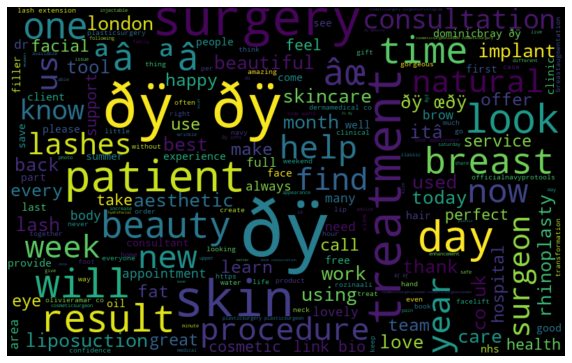

In [538]:
all_words = ' '.join([text for text in df['caption']]) 
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

Understanding the common words used in the Positive captions: WordCloud

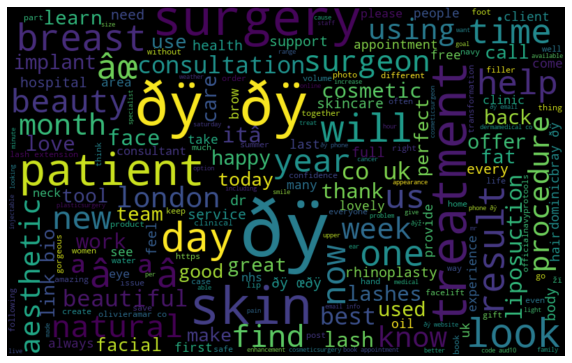

In [539]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
normal_words =' '.join([text for text in df['caption'][df['TextBlob_Analysis'] == 'Positive']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Understanding the common words used in the Negative captions: WordCloud

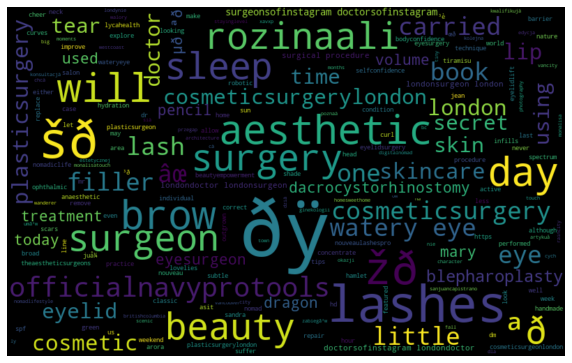

In [540]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
normal_words =' '.join([text for text in df['caption'][df['TextBlob_Analysis'] == 'Negative']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Understanding the common words used in the Neutral captions: WordCloud

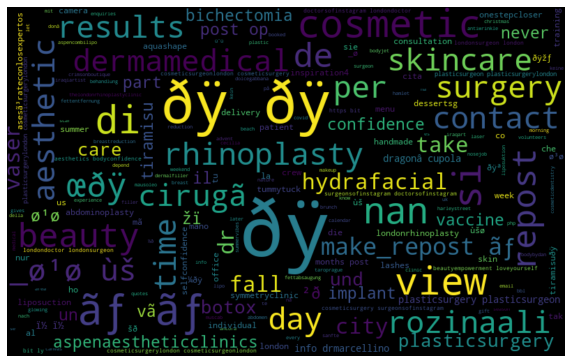

In [541]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
normal_words =' '.join([text for text in df['caption'][df['TextBlob_Analysis'] == 'Neutral']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [542]:
def hashtag_extract1(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [543]:
HT_positive = hashtag_extract1(df['caption'][df['TextBlob_Analysis'] == 'Positive'])

In [ ]:
HT_positive

In [545]:
HT_negative = hashtag_extract1(df['caption'][df['TextBlob_Analysis'] == 'Negative'])

In [546]:
HT_neutral = hashtag_extract1(df['caption'][df['TextBlob_Analysis'] == 'Neutral'])

In [547]:
HT_positive = sum(HT_positive,[]) 
HT_negative = sum(HT_negative,[])
HT_neutral = sum(HT_neutral,[])

Let's plot the top ‘n’ hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

In [548]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame(
    {
    'Hashtag': list(a.keys()),
    'Count': list(a.values())
    }
)

selecting top 20 most frequent hashtags in Positive hashtags

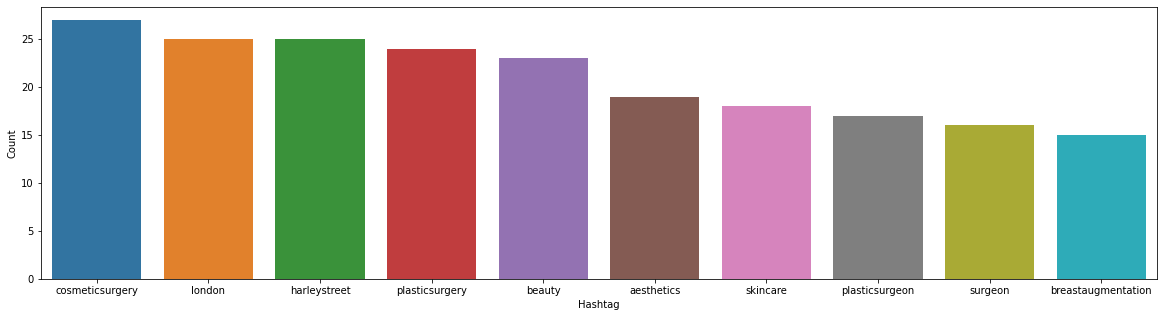

In [549]:
import seaborn as sns 

d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

selecting top 20 most frequent hashtags in Negative hashtags

In [550]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame(
    {
    'Hashtag': list(a.keys()),
    'Count': list(a.values())
    }
)

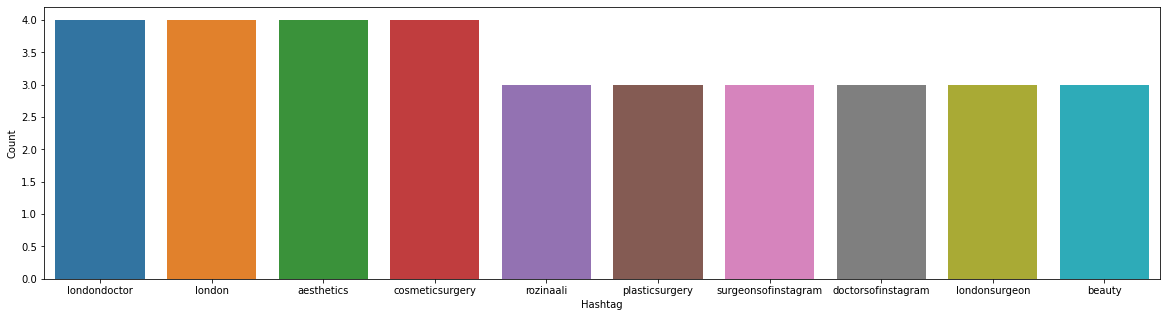

In [551]:
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

selecting top 20 most frequent hashtags in Neutral hashtags

In [552]:
a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame(
    {
    'Hashtag': list(a.keys()),
    'Count': list(a.values())
    }
)

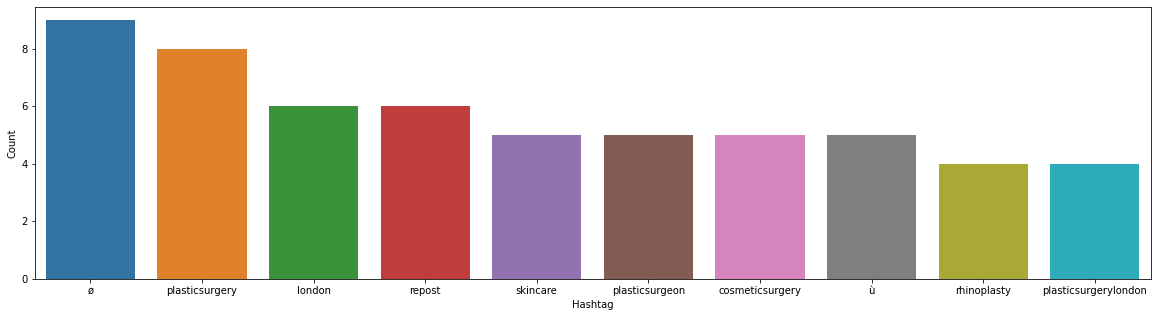

In [553]:
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

###Bag of words Features

In [554]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['caption'])
bow.shape

(519, 1000)

##TFIDF

In [555]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['caption'])
tfidf.shape

(519, 1000)

##Word2Vec Features

In [559]:
import gensim 

tokenized_tweet = df['caption'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
)
model_w2v.train(tokenized_tweet, total_examples= len(df['caption']), epochs=20)

(359446, 552140)

In [291]:
model_w2v.wv.most_similar(positive="beauty")

[('purpose', 0.8304997086524963),
 ('business', 0.8300100564956665),
 ('quality', 0.8237757682800293),
 ('fluffy', 0.8211236000061035),
 ('fans.', 0.8148579001426697),
 ('becoming', 0.8061707615852356),
 ('backstage.', 0.8053984642028809),
 ('isolating', 0.8051235675811768),
 ('education', 0.8026103973388672),
 ('ðÿ•š', 0.8020203113555908)]

### Preparing vectors for tweet

Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. The length of the resultant vector will be the same, i.e. 200. We will repeat the same process for all the tweets in our data and obtain their vectors. Now we have 200 word2vec features for our data.

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [292]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

Preparing word2vec feature set

In [293]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(519, 200)

Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.

#Modelling